<a href="https://colab.research.google.com/github/H1manshupandey/Data-Science-Projects/blob/main/Gas_Turbine_Emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A powerplant engine( gas-turbine) is mainly used to generate electricity. Since the engine can different types of fuels, the engine can have different levels of CO2 and NO emission gases.

*More info:*
https://journals.tubitak.gov.tr/elektrik/issues/elk-19-27-6/elk-27-6-54-1807-87.pdf

Column name descriptions:
* Variable (Abbr.) Unit Min Max Mean
* Ambient temperature (AT) C â€“6.23 37.10 17.71
* Ambient pressure (AP) mbar 985.85 1036.56 1013.07
* Ambient humidity (AH) (%) 24.08 100.20 77.87
* Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
* Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
* Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
* Turbine after temperature (TAT) C 511.04 550.61 546.16
* Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
* Turbine energy yield (TEY) MWH 100.02 179.50 133.51
* Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
* Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

**Objective**

1.   Create a regression model to generate the level of Carbon monoxide (CO) and Nitrogen oxides (NOx).
2.   Find out which features are most correlated to CO2 and NO


In [ ]:
! python -m pip install --upgrade pip
! python -m pip install scikit-learn-intelex

from collections import defaultdict

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_validate, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  Obtaining dependency information for scikit-learn-intelex from https://files.pythonhosted.org/packages/3d/89/36bf3b024b86ae3c1de86fcaa11ef6e6dfc4d223f491cc648ce6edeea74f/scikit_learn_intelex-2023.2.1-py310-none-manylinux1_x86_64.whl.metadata
  Obtaining dependency information for daal4py==2023.2.1 from https://files.pythonhosted.org/packages/18/7a/a3ecef294e068a38d8e8d370e84127afca3f95d726d24b044e8928aa1cf8/daal4py-2023.2.1-py310-none-manylinux1_x86_64.whl.metadata
  Obtaining dependency information for daal==2023.2.1 from https://files.pythonhosted.org/packages/e0/51/9369c49b50a51279660c31b0ec22afcb649f082fd2753915d1306dc6d038/daal-2023.2.1-py2.py3-none-manylinux1_x86_64.whl.metadata
  Obtaining dependency information for tbb==2021.* from https://files.pythonhosted.

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gt_full.csv')
df.head()

Unnamed: 0      AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY  \
0           1  4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67   
1           2  4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67   
2           3  3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10   
3           4  3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03   
4           5  3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67   

      CDP       CO     NOX  
0  11.898  0.32663  81.952  
1  11.892  0.44784  82.377  
2  12.042  0.45144  83.776  
3  11.990  0.23107  82.505  
4  11.910  0.26747  82.028

In [ ]:
df = df.drop(df.columns[0], axis=1)
df.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898   
1  4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892   
2  3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042   
3  3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990   
4  3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910   

        CO     NOX  
0  0.32663  81.952  
1  0.44784  82.377  
2  0.45144  83.776  
3  0.23107  82.505  
4  0.26747  82.028

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB


In [ ]:
df.describe()

AT            AP            AH          AFDP          GTEP  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean      17.712726   1013.070165     77.867015      3.925518     25.563801   
std        7.447451      6.463346     14.461355      0.773936      4.195957   
min       -6.234800    985.850000     24.085000      2.087400     17.698000   
25%       11.781000   1008.800000     68.188000      3.355600     23.129000   
50%       17.801000   1012.600000     80.470000      3.937700     25.104000   
75%       23.665000   1017.000000     89.376000      4.376900     29.061000   
max       37.103000   1036.600000    100.200000      7.610600     40.716000   

                TIT           TAT           TEY           CDP            CO  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean    1081.428084    546.158517    133.506404     12.060525      2.372468   
std       17.536373      6.842360     15.618634      1.088795      2.262672   
min     1000.800000    511.040000    100.020000      9.851800      0.000388   
25%     1071.800000    544.720000    124.450000     11.435000      1.182400   
50%     1085.900000    549.880000    133.730000     11.965000      1.713500   
75%     1097.000000    550.040000    144.080000     12.855000      2.842900   
max     1100.900000    550.610000    179.500000     15.159000     44.103000   

                NOX  
count  36733.000000  
mean      65.293067  
std       11.678357  
min       25.905000  
25%       57.162000  
50%       63.849000  
75%       71.548000  
max      119.910000

What you immediately want to pay attention to when looking at these values: the GTEP parameter (gas pressure at the outlet of the turbine) clearly does not correspond to the correct values. The pressure at the outlet of the turbine must be comparable to atmospheric pressure. Most likely, this indicates excess pressure relative to atmospheric pressure. The next CDP parameter (pressure after the compressor) is allegedly measured in millibars, which is also not true. Most likely, the compression ratio of the compressor is indicated here as the ratio of outlet pressure to inlet pressure. The rest of the values ​​are correct.

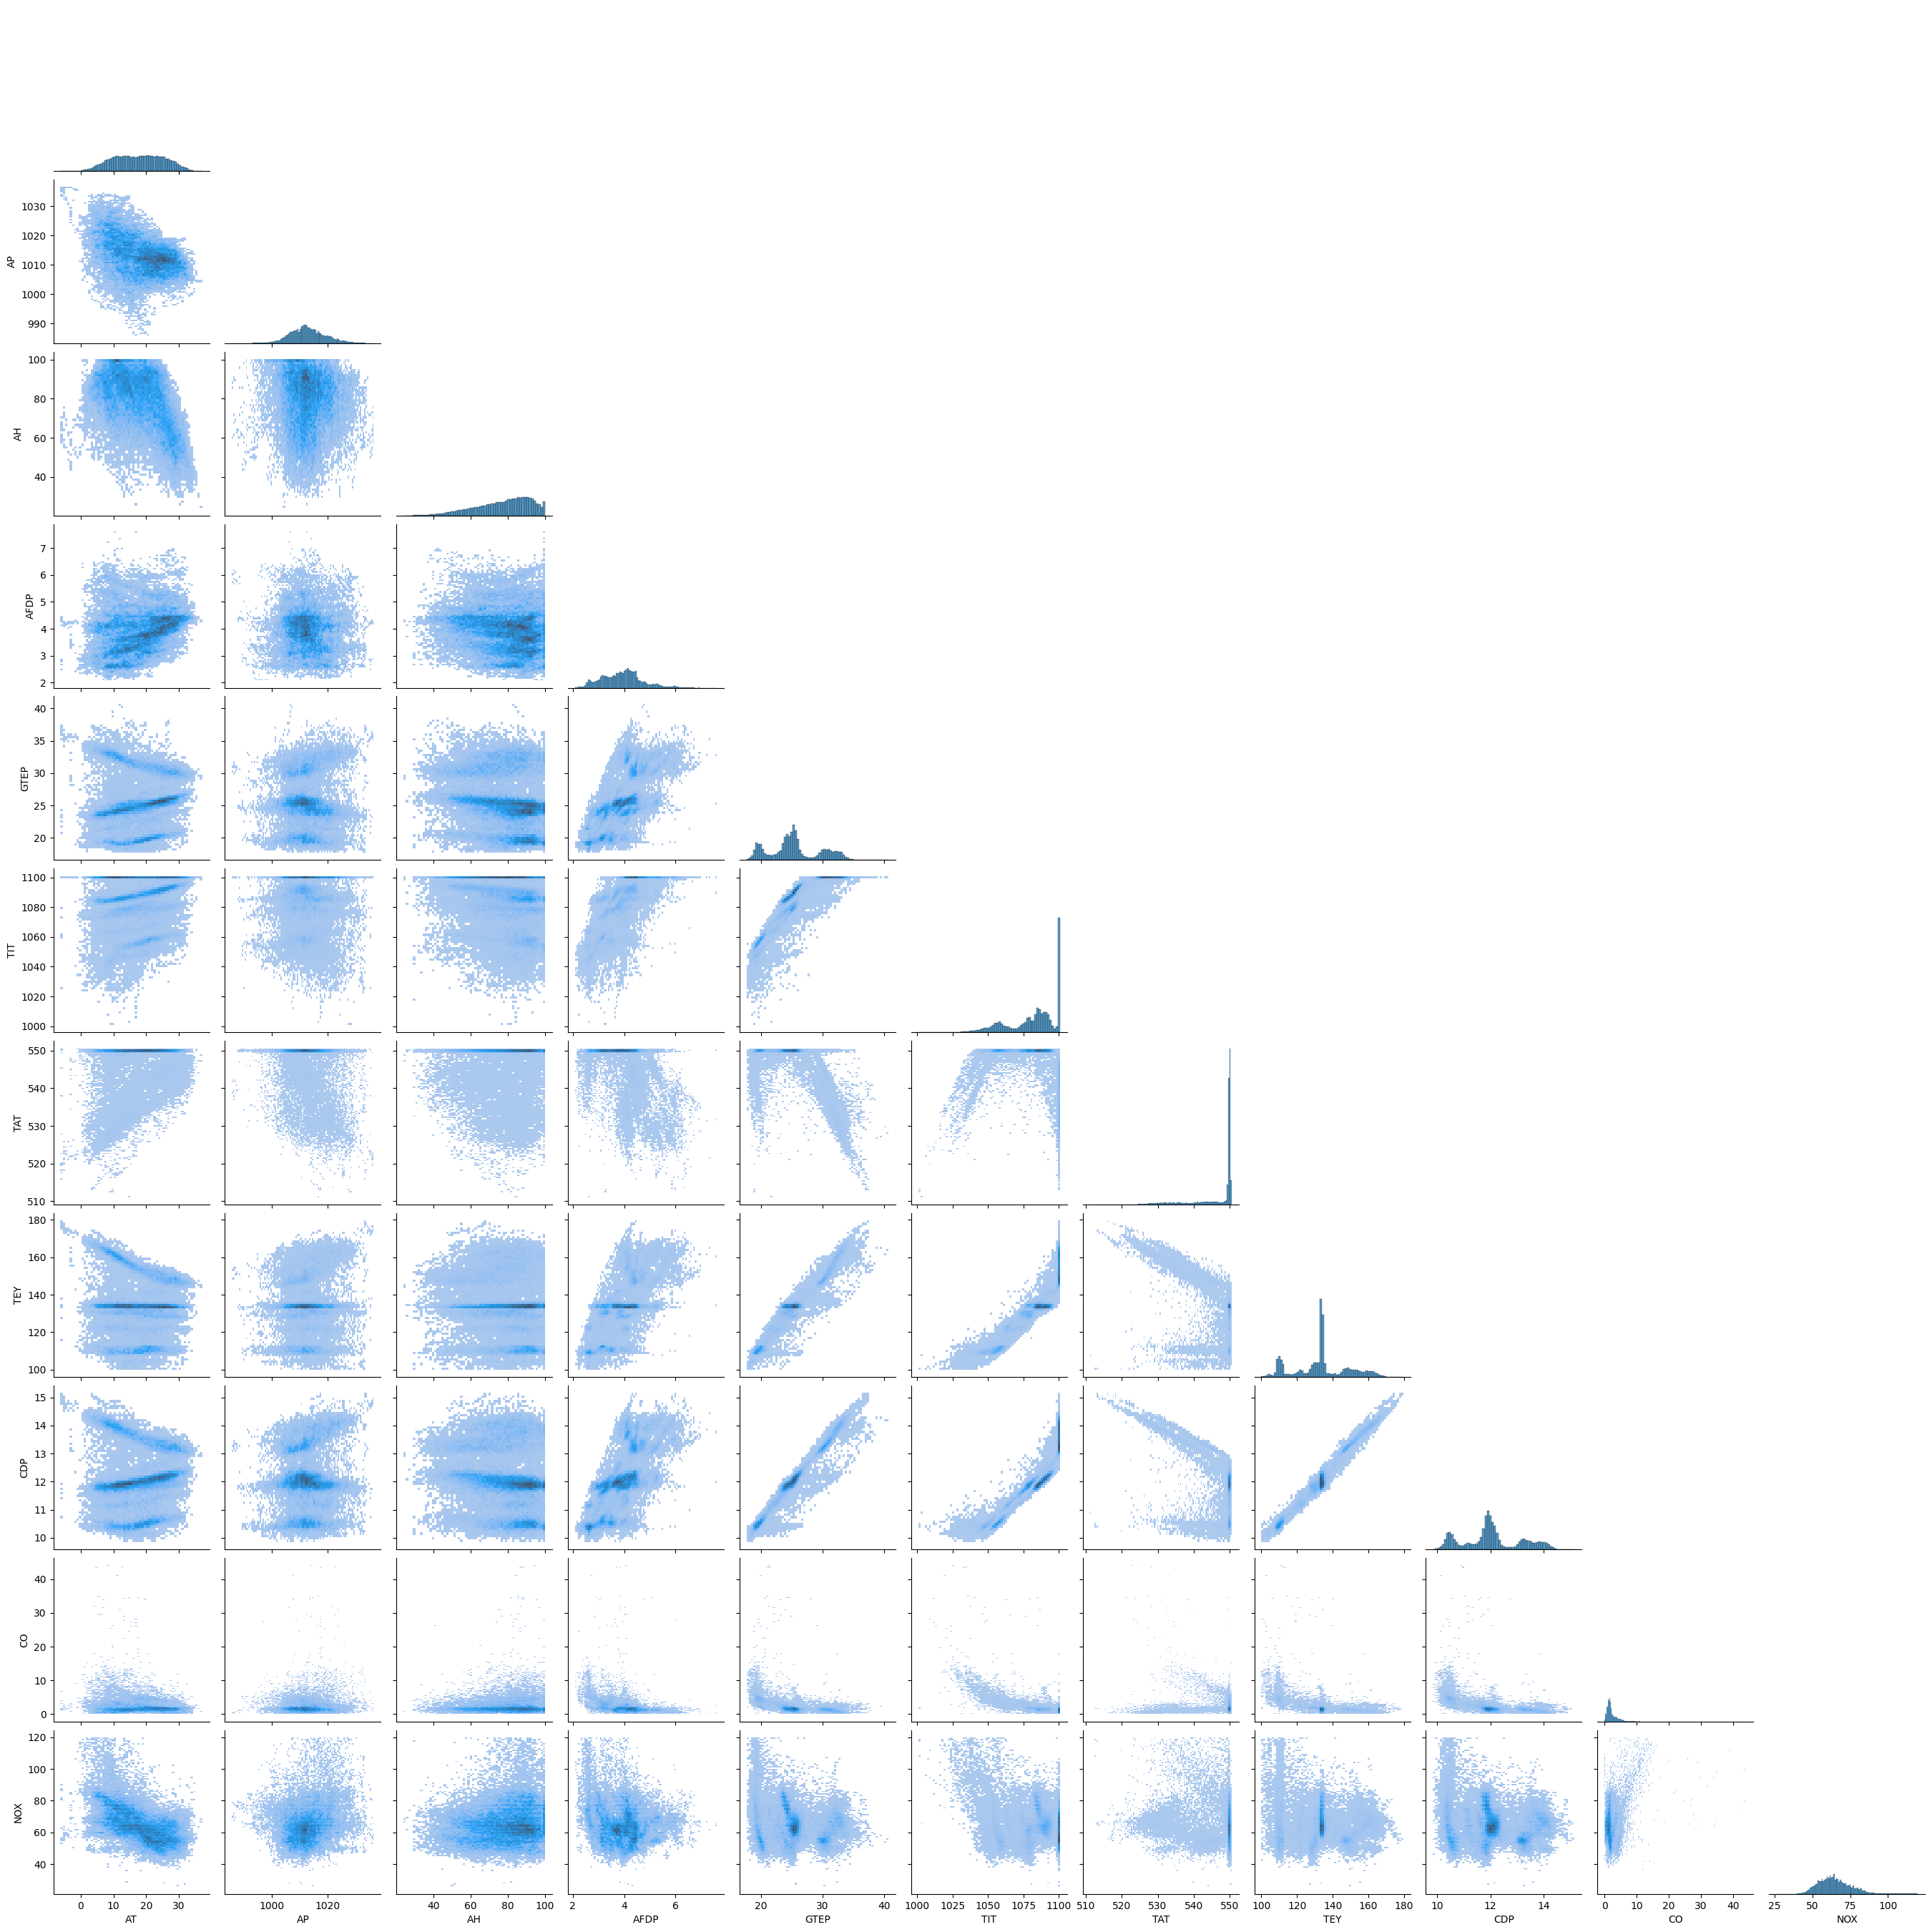

In [ ]:
sns.pairplot(df, corner=True, kind='hist');

It can be seen that there is a fairly strong correlation between some parameters. And the sign of CO clearly has a lot of outliers

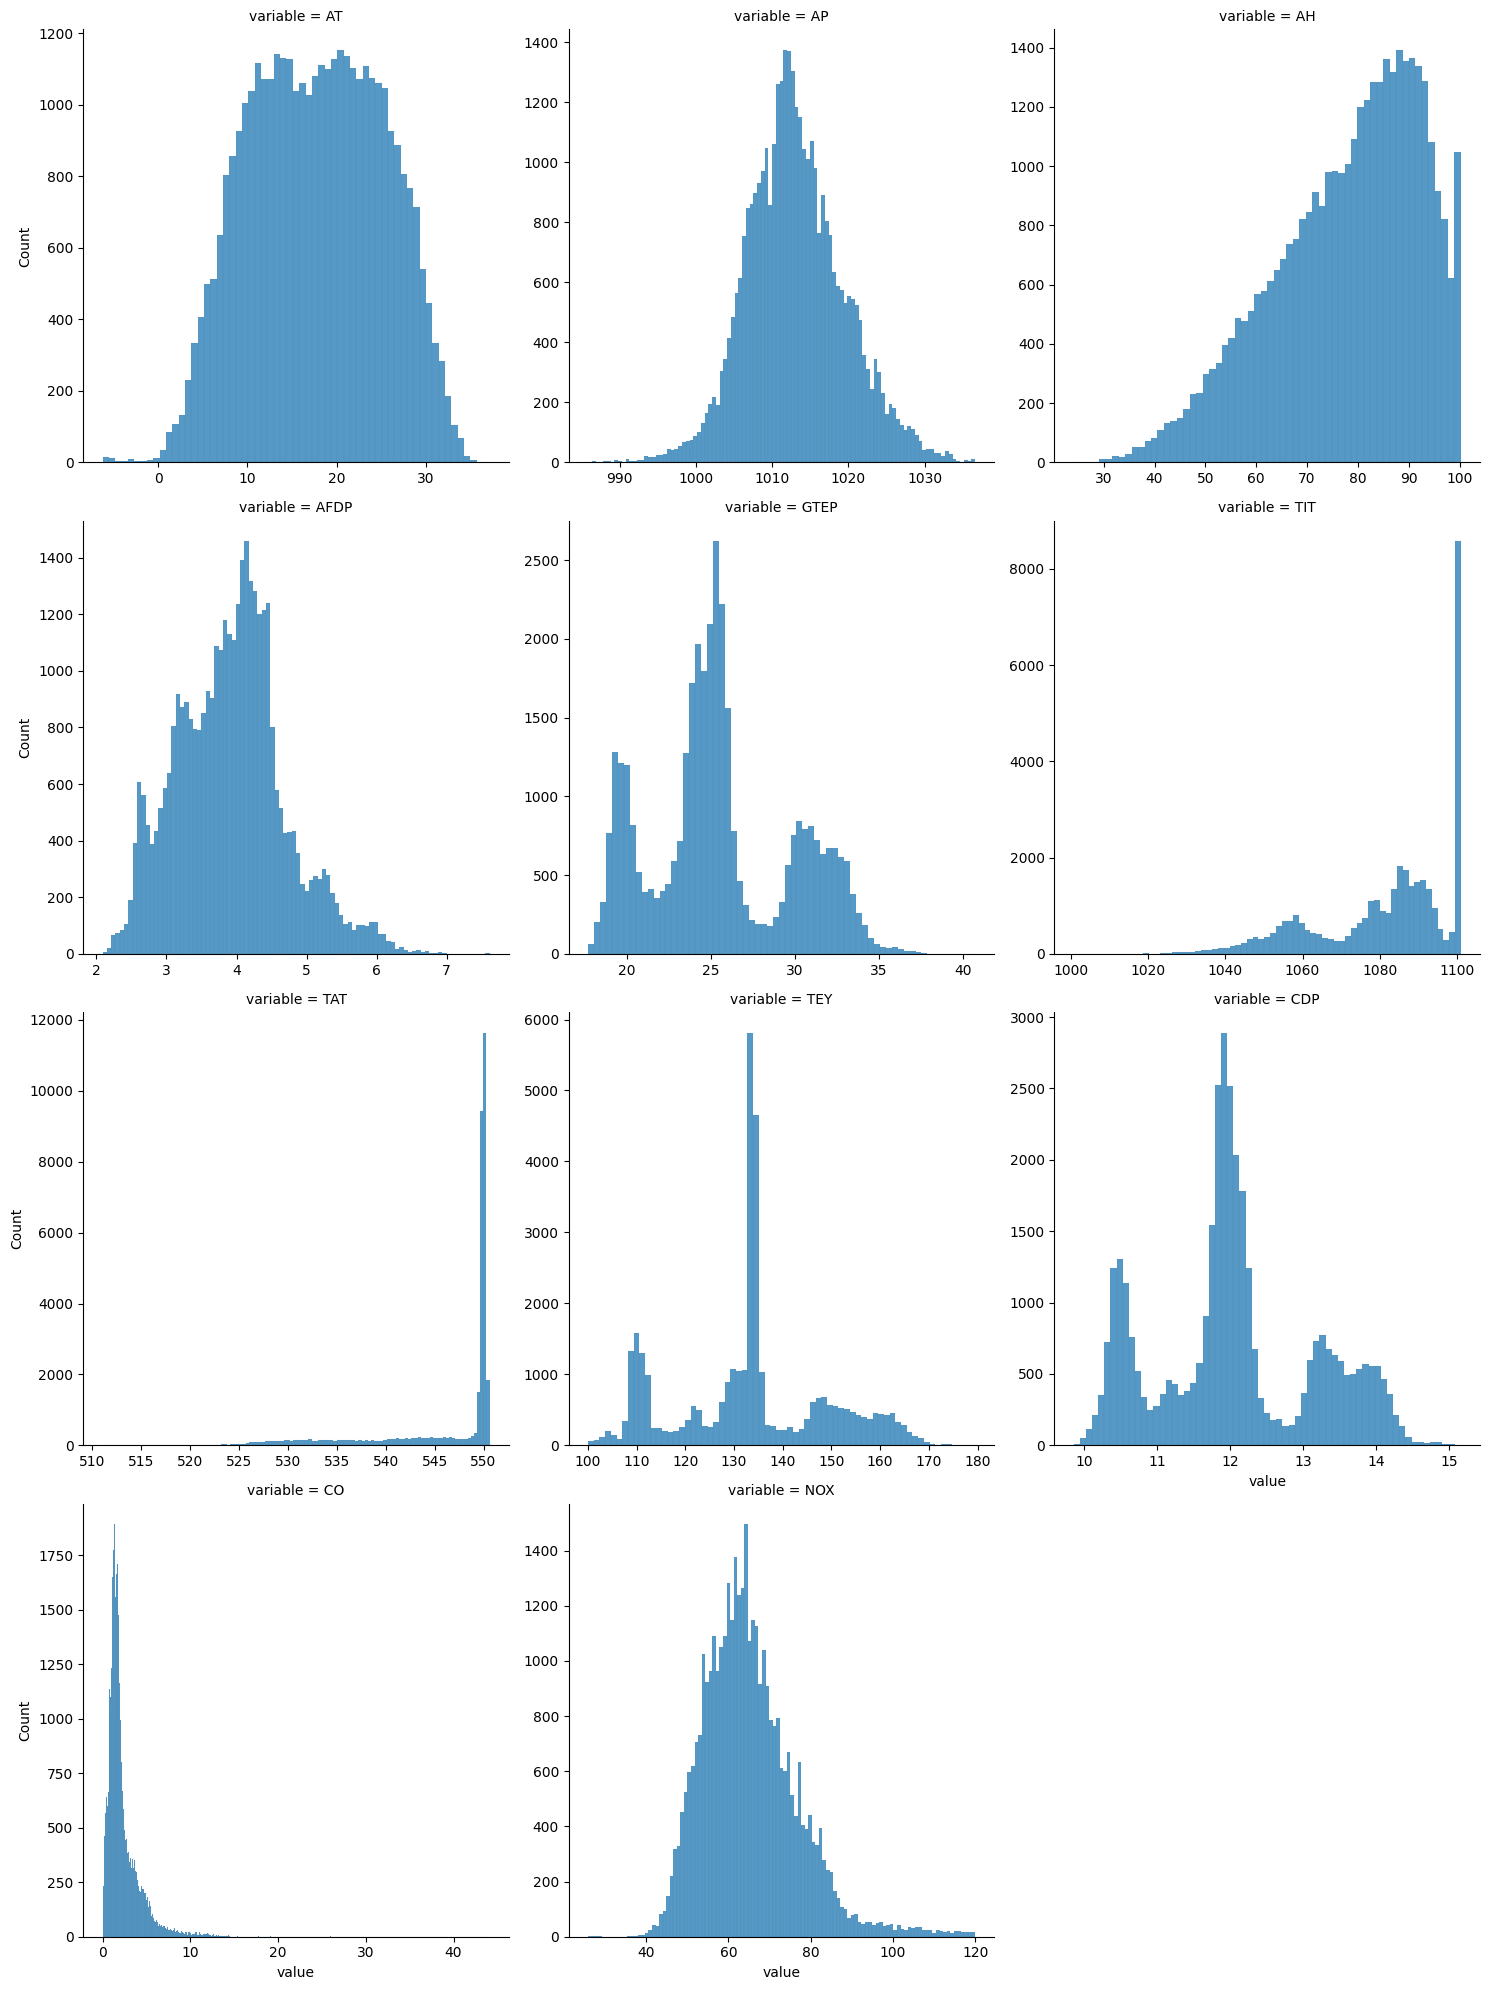

In [ ]:
sns.displot(
    x='value',
    data=df.melt(value_vars=df),
    col='variable',
    kind='hist',
    col_wrap=3,
    facet_kws={'sharex':False, 'sharey':False},
    common_bins=False
);

Only temperature and pressure are normally distributed. Humidity is skewed towards higher values, which can be explained by the location of most of the gas turbines in the coastal zone. Anomalies are clearly present in the values ​​of emissions of harmful substances. As for the other parameters, their distributions raise many questions.

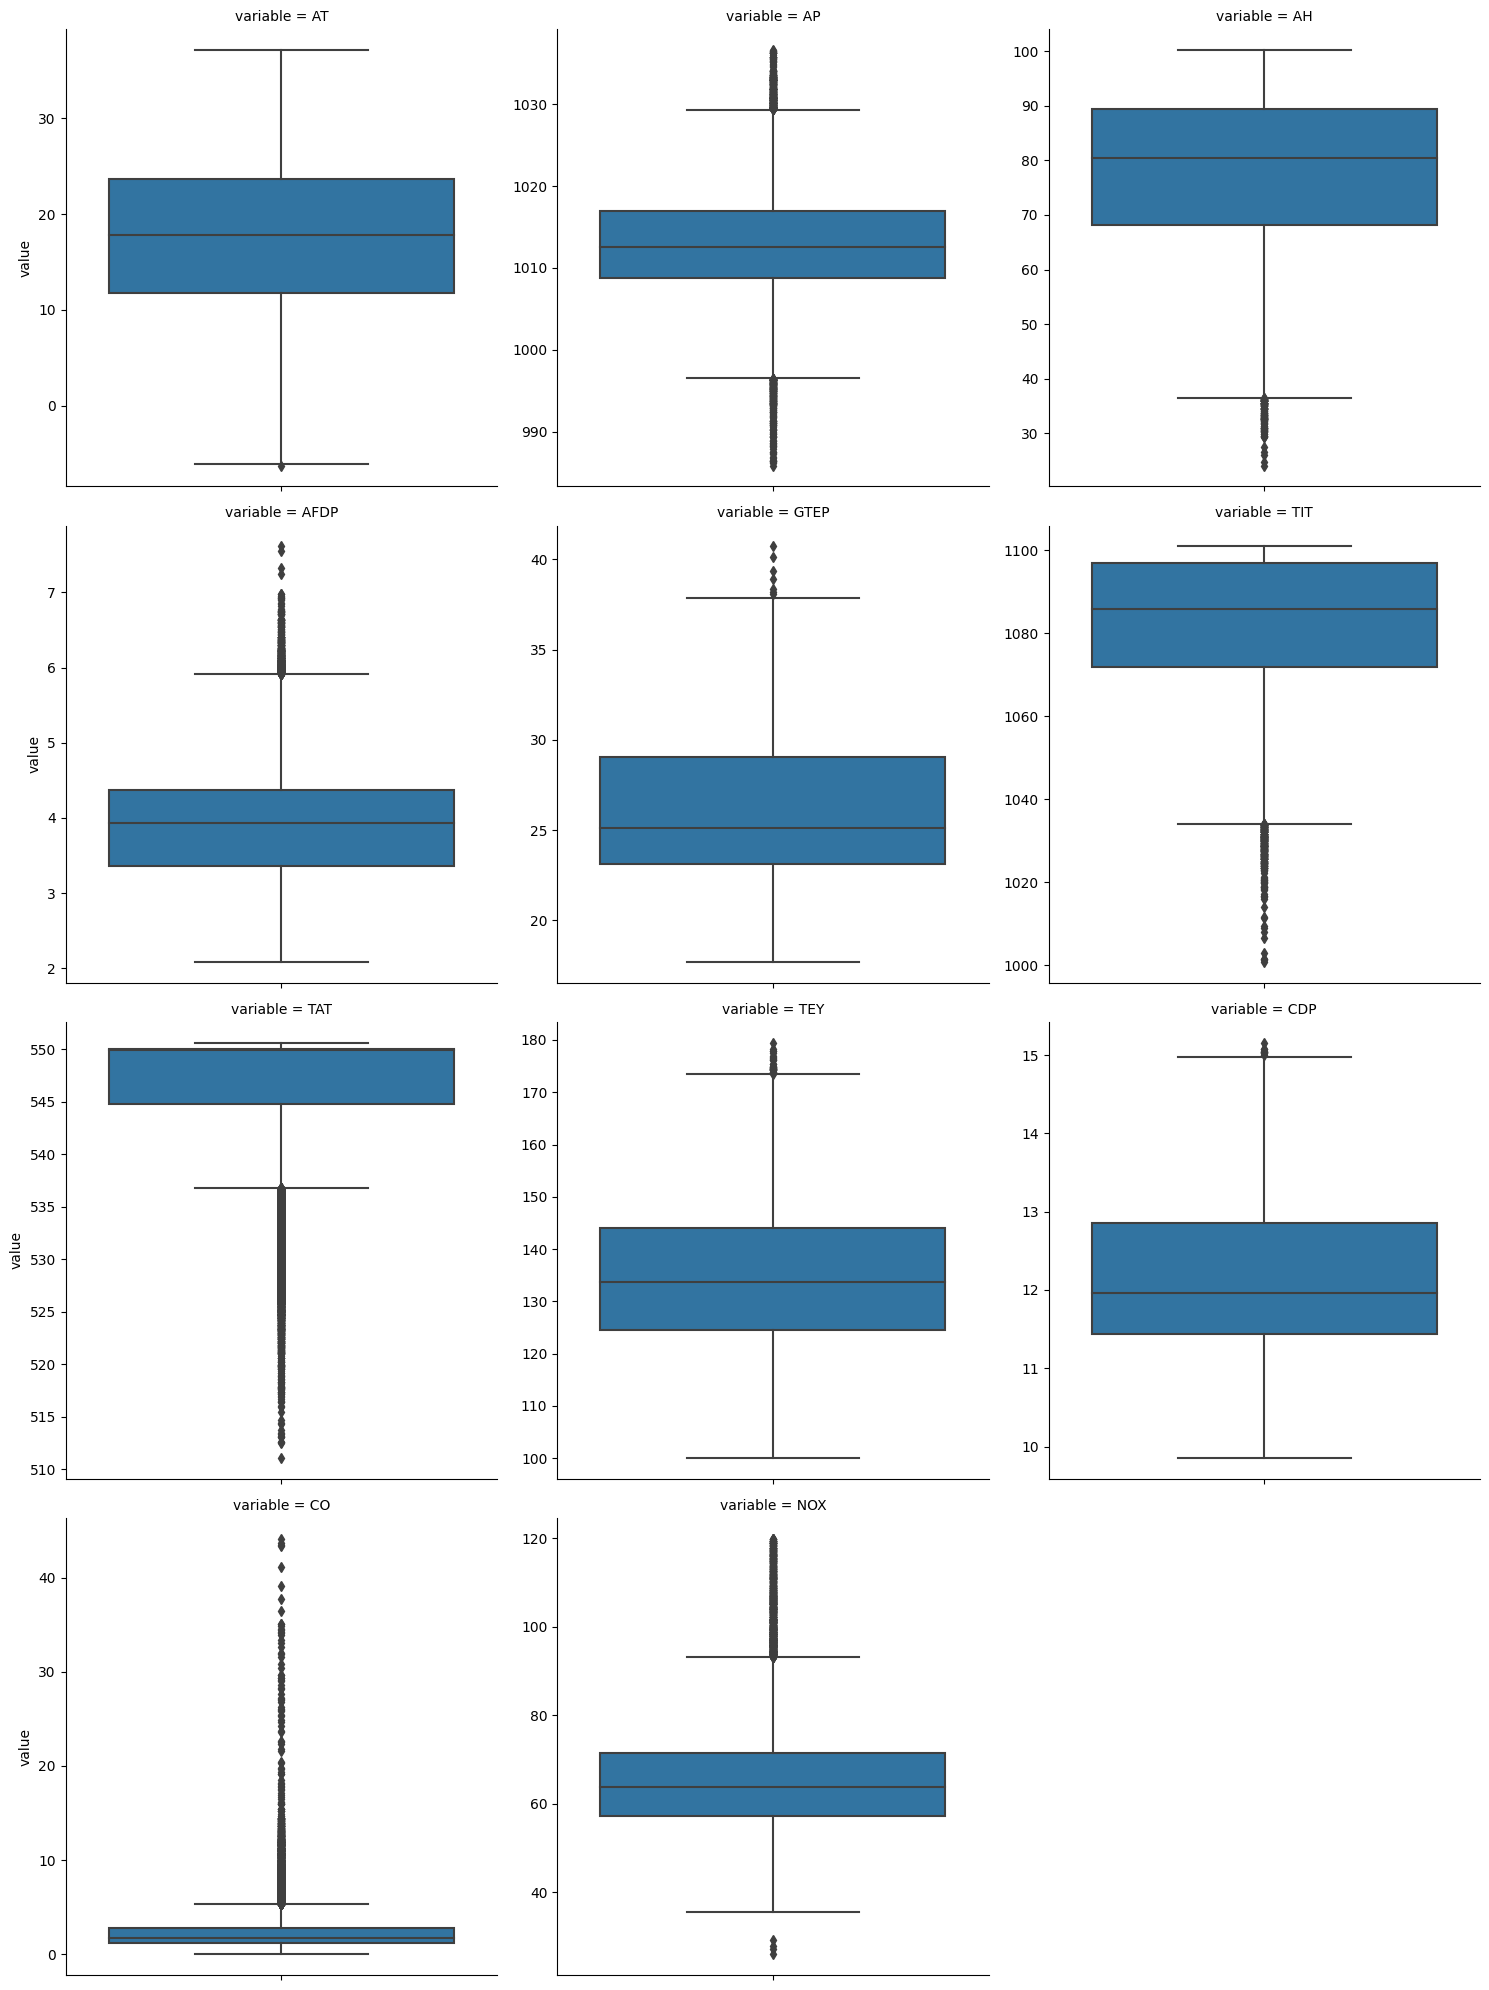

In [ ]:
sns.catplot(
    y='value',
    data=df.melt(value_vars=df.columns),
    col='variable',
    kind='box',
    col_wrap=3,
    sharex=False,
    sharey=False,
);

The boxplot shows that more input variables are outliers, so I'll use mean absolute error (MAE) to evaluate the model in modeling. The MAE is not sensitive to the outliers

Yes, there are many anomalies. At the same time, some values ​​that are anomalies in relation to the interquartile range may be quite real values. For example, if the fuel used is not natural gas, but liquid fuel (for example, kerosene), then the temperatures both before and after the turbine will be lower. But GTUs running on liquid fuels are used much less frequently than on natural gas, so there are fewer such values.

We see a very large number of emissions among the values ​​for carbon monoxide. As a rule, increased CO values ​​among the combustion products can also be the norm if the turbine operates in transient modes (start-up, warm-up), but usually these modes are short-lived. Also, the type of fuel and its quality can also affect the amount of emissions.

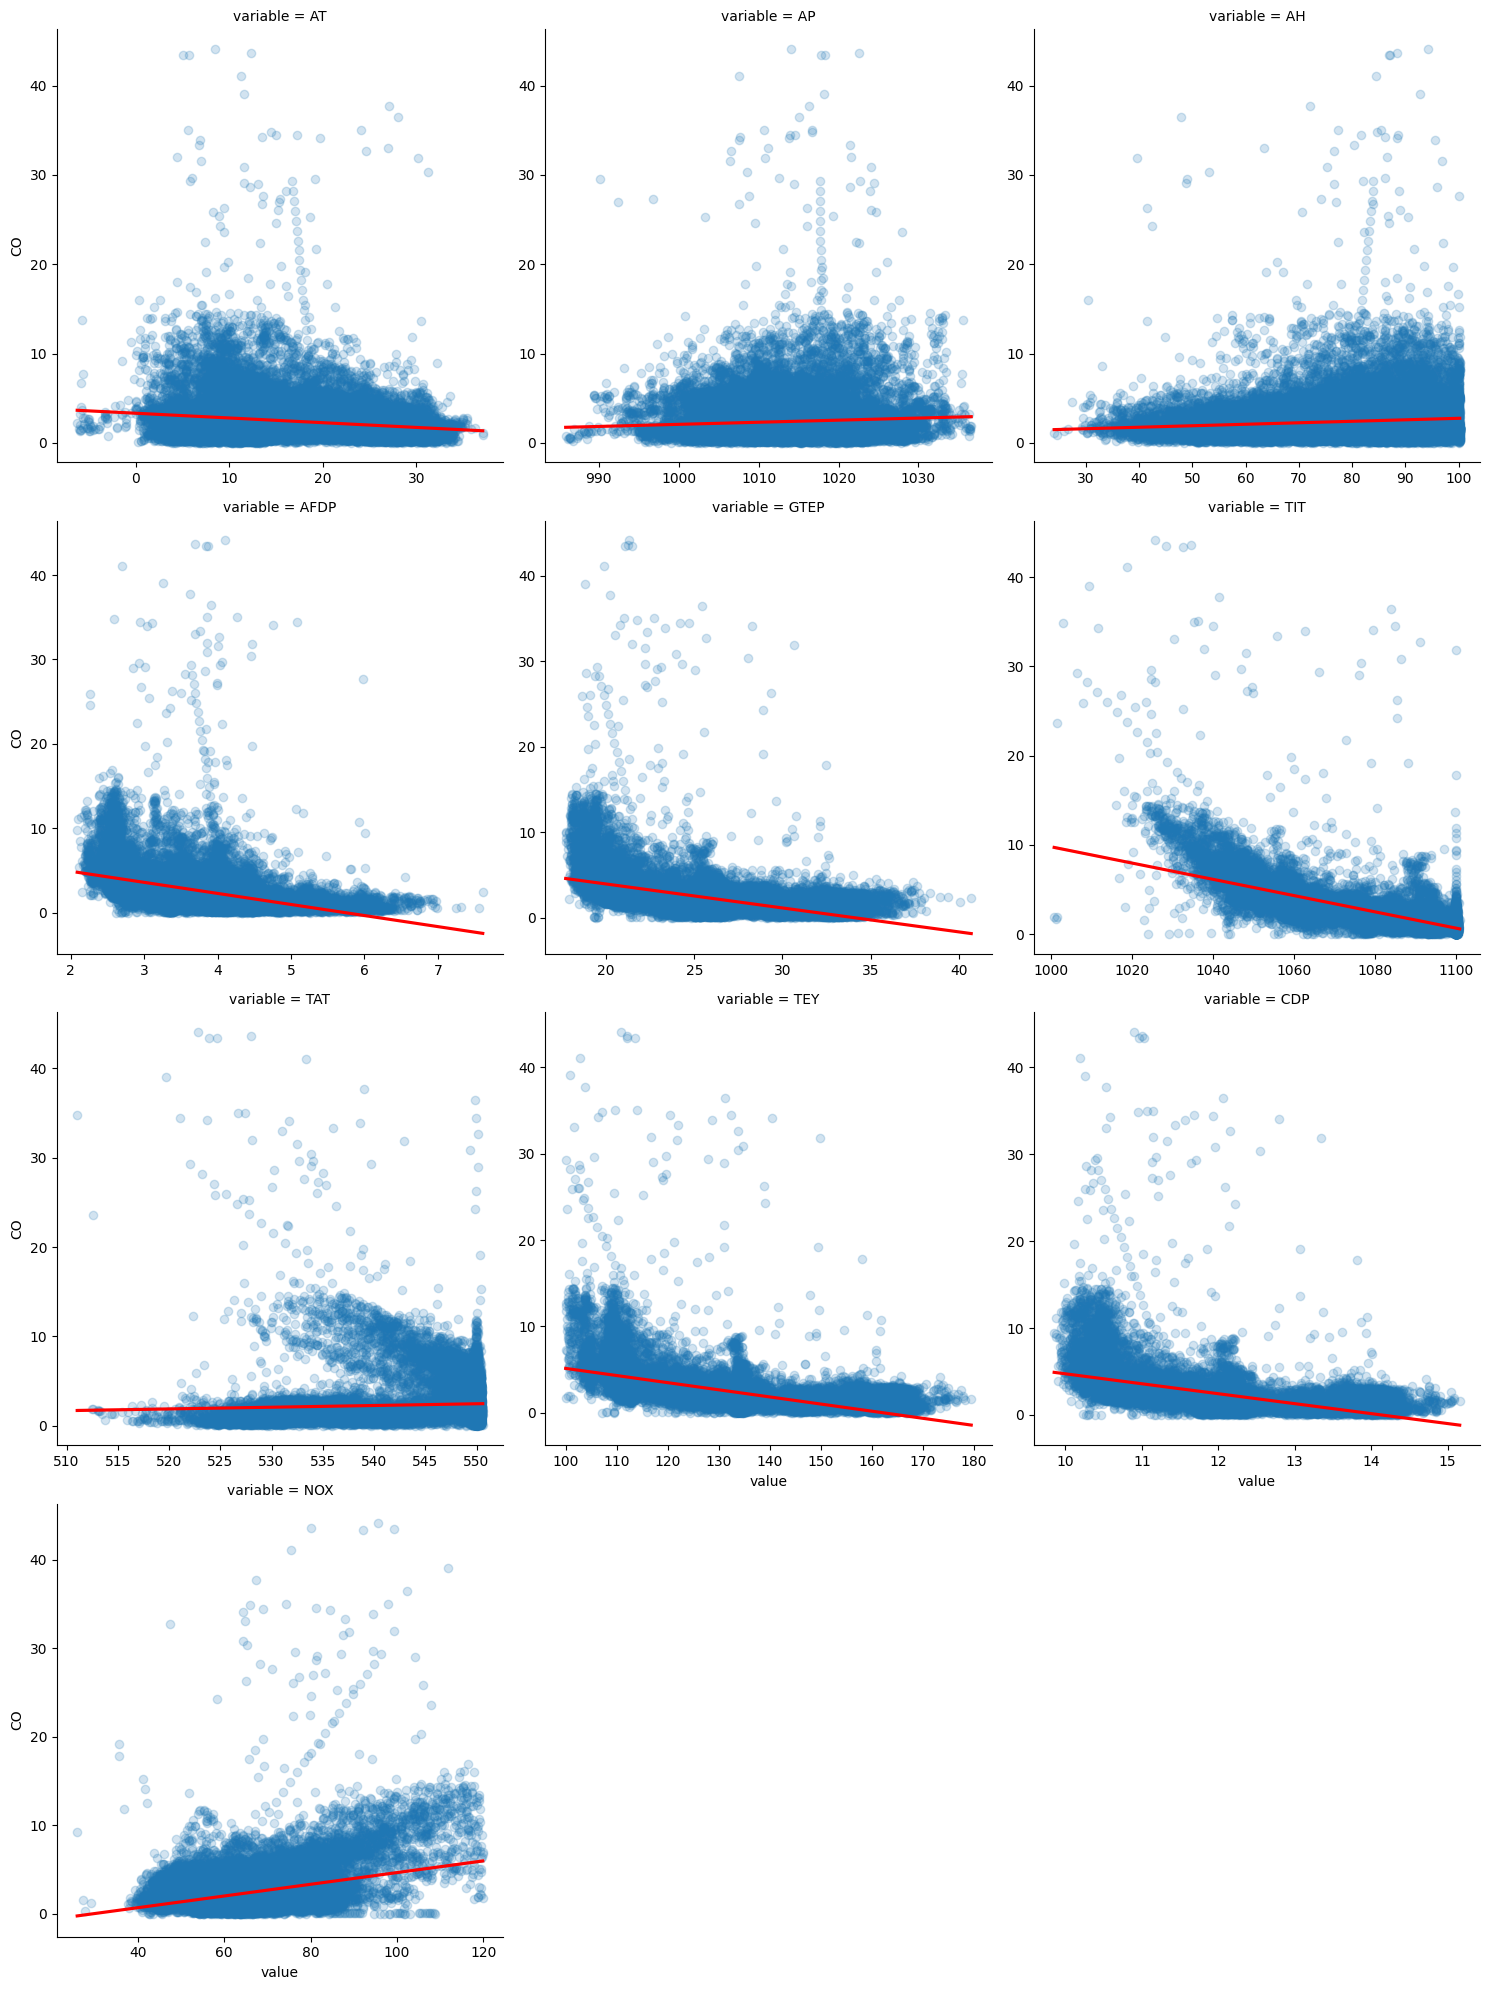

In [ ]:
ax = sns.lmplot(
    x='value',
    y='CO',
    data=df.melt(id_vars='CO', value_vars=df),
    col='variable',
    col_wrap=3,
    sharex=False,
    sharey=False,
    line_kws={'color': 'red'},
    scatter_kws={'alpha': 0.2}
)
ax.tight_layout();

Dependences are well traced that with the growth of TEY (here, most likely, we mean not the calculated capacity of the gas turbine, but the measured current), CDP, TIT, the amount of CO emissions decreases

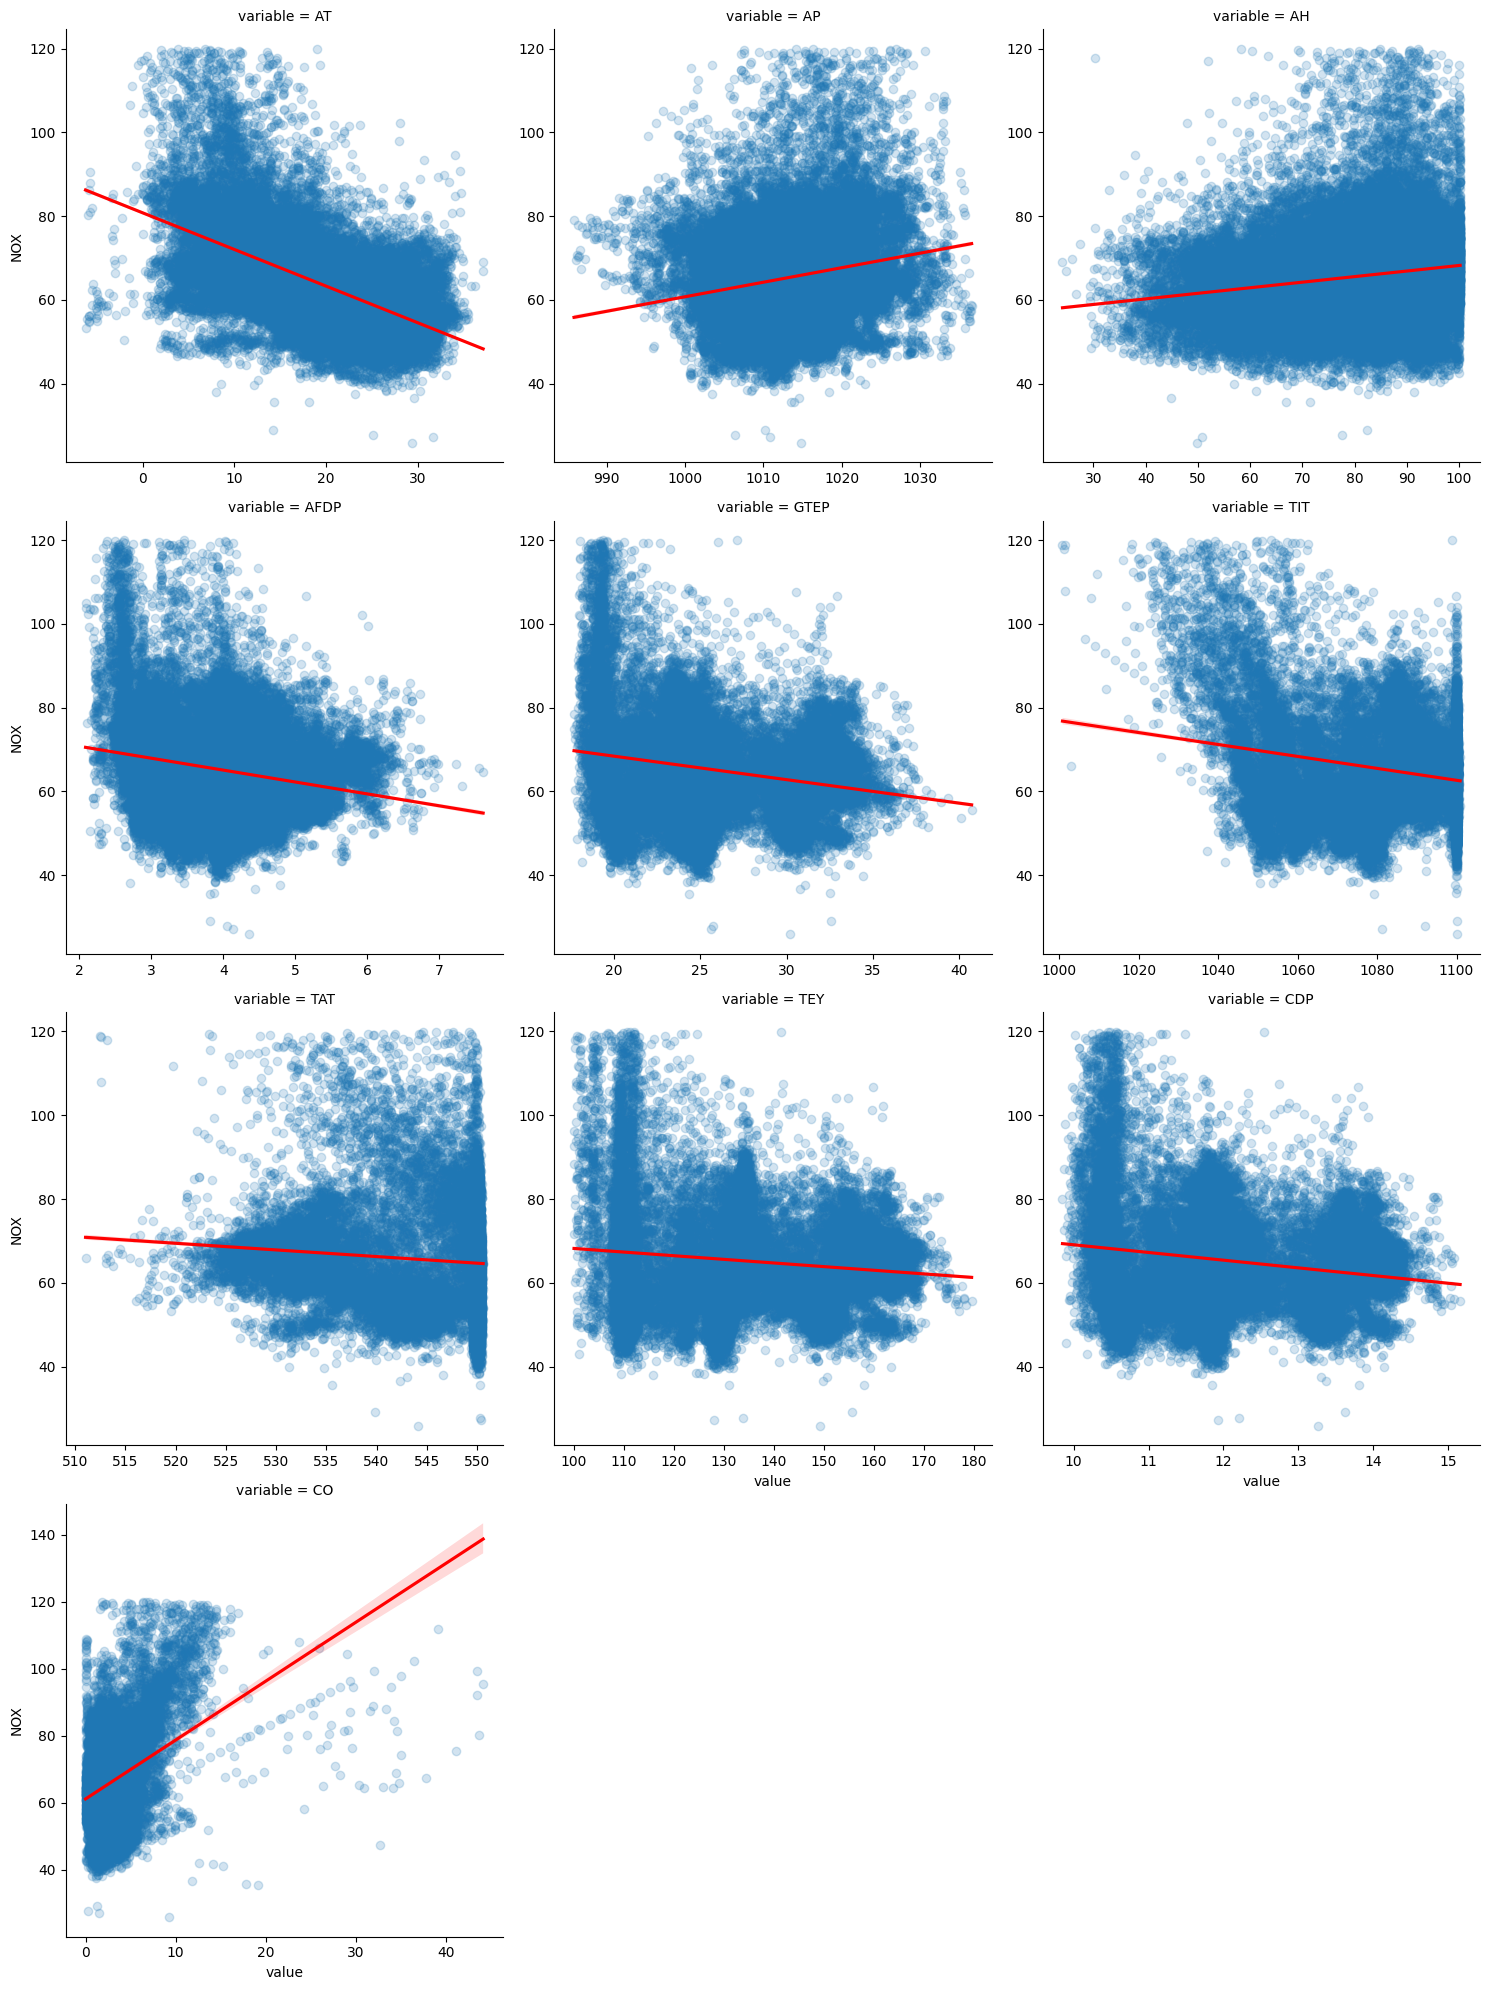

In [ ]:
ax = sns.lmplot(
    x='value',
    y='NOX',
    data=df.melt(id_vars='NOX', value_vars=df),
    col='variable',
    col_wrap=3,
    sharex=False,
    sharey=False,
    line_kws={'color': 'red'},
    scatter_kws={'alpha': 0.2}
)
ax.tight_layout();

Here the dependencies are not so obvious. But the relationship between carbon monoxide and nitrogen oxides is very good.

In [ ]:
# creating head map with correlation values.

'''
The code below is copied from:
https://stackoverflow.com/questions/39409866/correlation-heatmap
'''
# import the packages
import seaborn as sns

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
corr = df.corr()
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '150px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

The heatmap above shows the correlation between features and output variables(CO and NOx). It is easy to see that some features are negatively correlated each other. For example, the correlation between TIT and CO is -0.71, and it means that when the Turbine Inlet Temperature (TIT) decreases, the gas-turbine engine will produce more CO because a low TIT reduces the efficiency of the gas-turbine engine(look at the figure below).

<img src="https://www.researchgate.net/publication/282376063/figure/fig4/AS:399367862276099@1472228126114/Effect-of-TIT-and-compression-ratio-on-gas-turbine-power-out-and-gas-cycle-exergy.png" width="400px"/>

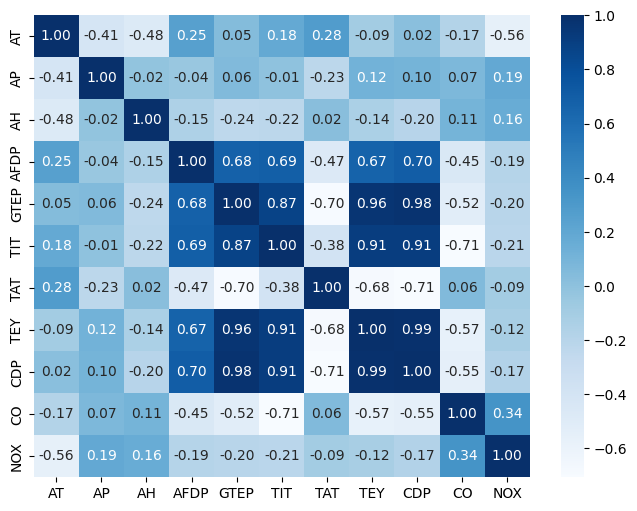

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df.corr(),
    annot=True,
    cmap='Blues',
    fmt='.2f',
);

Here the parameters can be divided into natural and technical. Natural are, respectively, air temperature, humidity and pressure. Technical - these are the performance characteristics of gas turbine plants. We see that the technical parameters have a fairly strong correlation with each other (except for the temperature after the turbine). Technical and natural parameters are weakly correlated, which is quite logical.

# Base Model

For now, we will not do anything with emissions. Let's try to get basic estimates, from which we will build on in the future.

In [ ]:

# Divide the dataset into training and test
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

X_train = df_train.drop(['CO', 'NOX'], axis=1)
y_train = df_train[['CO', 'NOX']].copy()


# Scale features
std = StandardScaler()
X_train_std = std.fit_transform(X_train)

In [ ]:
# Consider several models
lin_reg = LinearRegression()
svc_reg = SVR()
tre_reg = DecisionTreeRegressor(random_state=42)
rnd_reg = RandomForestRegressor(random_state=42)
xgb_reg = XGBRegressor(random_state=42, verbosity=0)


# Display the obtained values ​​of the metrics

metrics = defaultdict(dict)
scorers = ['neg_mean_squared_error', 'neg_mean_absolute_error']
features = ['CO', 'NOX']
for feature in features:
    for reg in (
        lin_reg,
        svc_reg,
        tre_reg,
        rnd_reg,
        xgb_reg,
        ):
        scores = cross_validate(reg, X_train_std, y_train[feature], scoring=scorers, n_jobs=-1)
        metrics[reg.__class__.__name__] = {
            **metrics[reg.__class__.__name__],
            **{
                f'{feature}_rmse': np.sqrt(-scores['test_neg_mean_squared_error']).mean(),
                f'{feature}_rmse_std': np.sqrt(-scores['test_neg_mean_squared_error']).std(),
                f'{feature}_mae': -scores['test_neg_mean_absolute_error'].mean(),
                f'{feature}_mae_std': scores['test_neg_mean_absolute_error'].std()
            }}

In [ ]:

# Define a function for a more visual representation

def display_metrics(metrics):
    return (pd.DataFrame(metrics).T.apply(pd.to_numeric).style.format('{:.3f}')
            .background_gradient(cmap=plt.get_cmap('PuBu'), axis=0))

display_metrics(metrics)

As you can see, RandomForestRegressor showed the best result. The result for XGBRegressor is slightly worse. Let's look at the importance of features

In [ ]:
def plot_feature_importance(model):
    importances = model.feature_importances_
    indices = np.argsort(importances)
    features = X_train.columns
    plt.title(f'Importance of features for {model.__class__.__name__}')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])

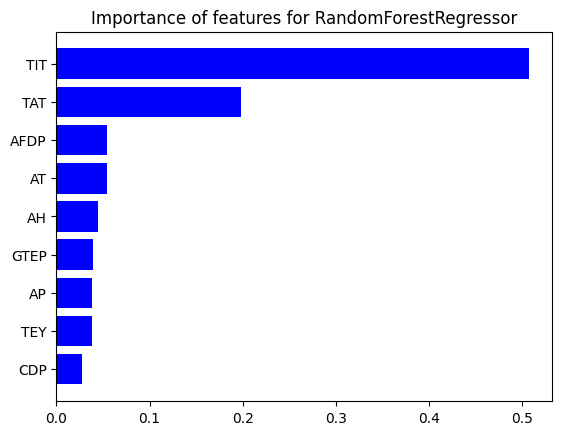

In [ ]:
# Derive the importance of features for CO
rnd_reg.fit(X_train_std, y_train['CO'])
plot_feature_importance(rnd_reg)

Here you can see that the main features for this model are the temperature before and after the turbine

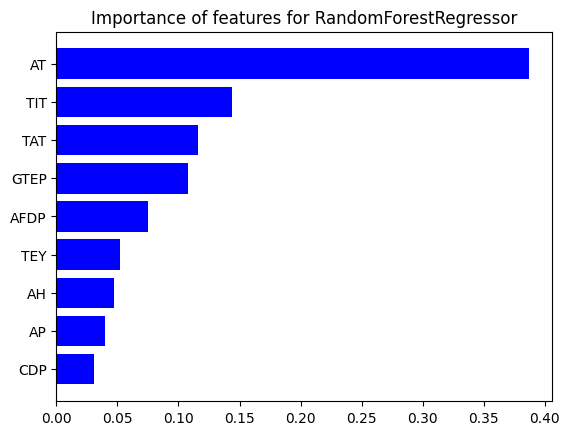

In [ ]:
# Derive feature importance for NOX
rnd_reg.fit(X_train_std, y_train['NOX'])
plot_feature_importance(rnd_reg)

For NOX, ambient temperature is a key indicator

# Removing outliers using the interquartile range

In [ ]:
# Remove outliers
# To do this, we define a function to determine the interquartile range

def calculate_iqr_boundaries(series):
    q25 = series.quantile(0.25)
    q75 = series.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    return boundaries

In [ ]:
# Find the boundaries of the corresponding interval
boundaries = pd.DataFrame(calculate_iqr_boundaries(X_train))
boundaries

AT       AP          AH      AFDP       GTEP     TIT        TAT  \
0  -5.987   996.65   36.765125  1.814862  14.074125  1033.5  536.67125   
1  41.451  1029.05  120.942125  5.919563  38.101125  1135.1  558.06125   

      TEY        CDP  
0   94.53   9.259375  
1  173.95  15.034375

In [ ]:
# Remove outliers from training data
features_max = [f for f in boundaries.columns if (X_train[f]>boundaries[f].max()).sum()]
features_min = [f for f in boundaries.columns if (X_train[f]<boundaries[f].min()).sum()]

for f in features_max:
    X_train[f][X_train[f] > boundaries[f][1]] = boundaries[f][1]

for f in features_min:
    X_train[f][X_train[f] < boundaries[f][0]] = boundaries[f][0]

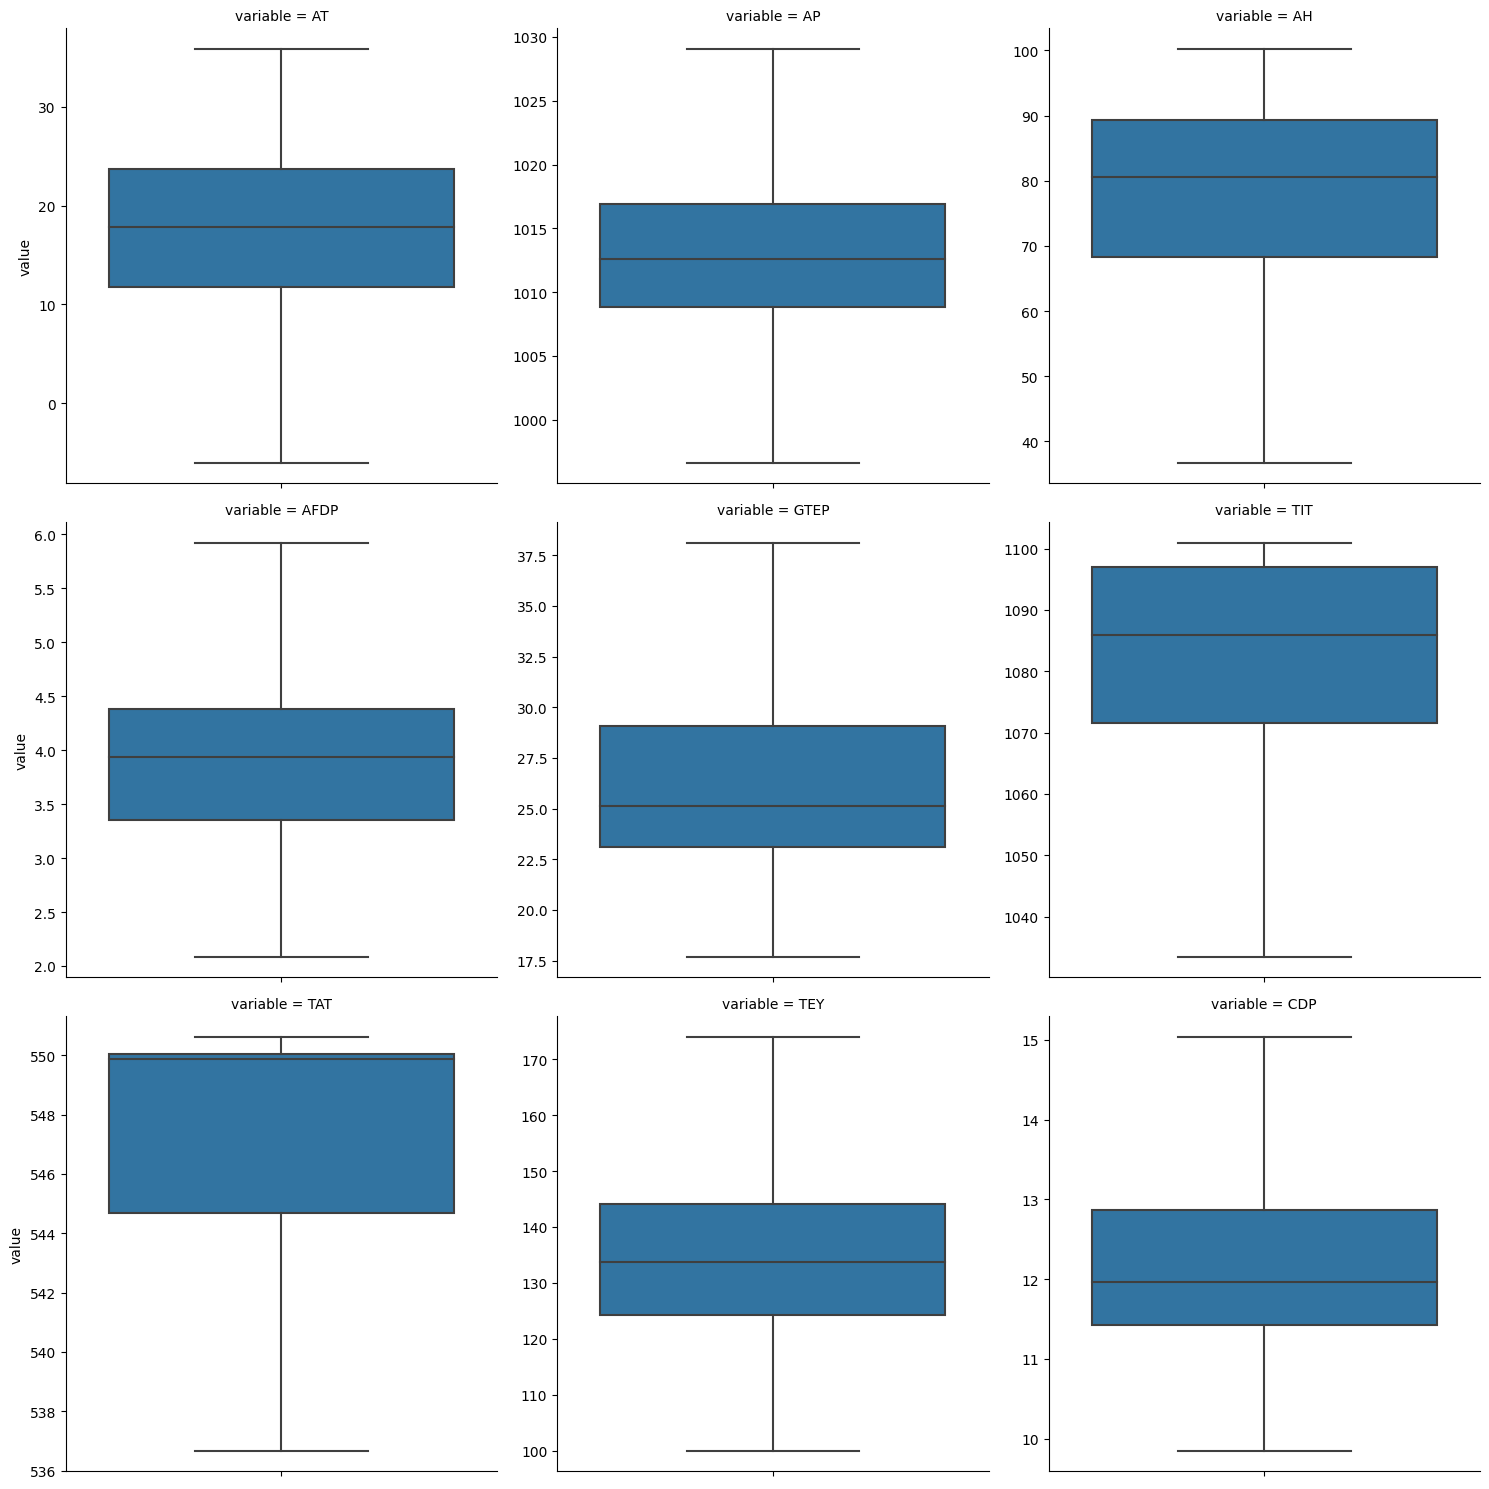

In [ ]:
# Let's look at the charts
sns.catplot(
    y='value',
    data=X_train.melt(value_vars=X_train.columns),
    col='variable',
    kind='box',
    col_wrap=3,
    sharex=False,
    sharey=False,
);

Great, no emissions!

In [ ]:
# Scale the new values

X_train_std = std.fit_transform(X_train)

# Update metric values

metrics1 = defaultdict(dict)
scorers = ['neg_mean_squared_error', 'neg_mean_absolute_error']
features = ['CO', 'NOX']
for feature in features:
    for reg in (
        lin_reg,
        svc_reg,
        tre_reg,
        rnd_reg,
        xgb_reg,
        ):
        scores = cross_validate(reg, X_train_std, y_train[feature], scoring=scorers, n_jobs=-1)
        metrics1[reg.__class__.__name__] = {
            **metrics1[reg.__class__.__name__],
            **{
                f'{feature}_rmse': np.sqrt(-scores['test_neg_mean_squared_error']).mean(),
                f'{feature}_rmse_std': np.sqrt(-scores['test_neg_mean_squared_error']).std(),
                f'{feature}_mae': -scores['test_neg_mean_absolute_error'].mean(),
                f'{feature}_mae_std': scores['test_neg_mean_absolute_error'].std()
            }}

display_metrics(metrics1)

Let's compare the obtained results with the basic estimates

In [ ]:

# Define the metrics comparison function

def diff_metrics(a, b):
    a1 = pd.DataFrame(a).apply(pd.to_numeric)
    b1 = pd.DataFrame(b).apply(pd.to_numeric)
    columns = a.keys()
    index = list(a.values())[0].keys()
    diff = pd.DataFrame((a1.values - b1.values)/b1.values*100, columns=columns, index=index)
    return diff.T.style.format('{:.2f}').background_gradient(cmap=plt.get_cmap('coolwarm'), axis=None, vmin=-10, vmax=10)

diff_metrics(metrics1, metrics)

Significant changes have not occurred, and in some respects it has even become worse. There is a simple explanation for this: we have removed the outliers among the features, but still have a very large number of outliers among the target values. To correct the situation, we need to understand which objects to consider as anomalous and not to use them, and to train on the correct values. Let's try to use DBSCAN clustering for this.


## Removing outliers with DBSCAN


Let's try the following steps:

* using DBSCAN, we will determine outliers on the entire training dataset;
* train the model only on the indices of the central samples of the training data;
* using the nearest neighbor method, we will learn how to predict outliers among test data.

In [ ]:
df_train_std = StandardScaler().fit_transform(df_train)
df_train_std = pd.DataFrame(df_train_std, columns=df_train.columns, index=df_train.index)

db = DBSCAN(eps=1.9, min_samples=40, n_jobs=-1)
db.fit(df_train_std)

# Look at the number of clusters and outliers

unique, counts = np.unique(db.labels_, return_counts=True)
np.c_[unique, counts]

array([[   -1,   138],
       [    0, 29248]])

We see a small amount of emissions

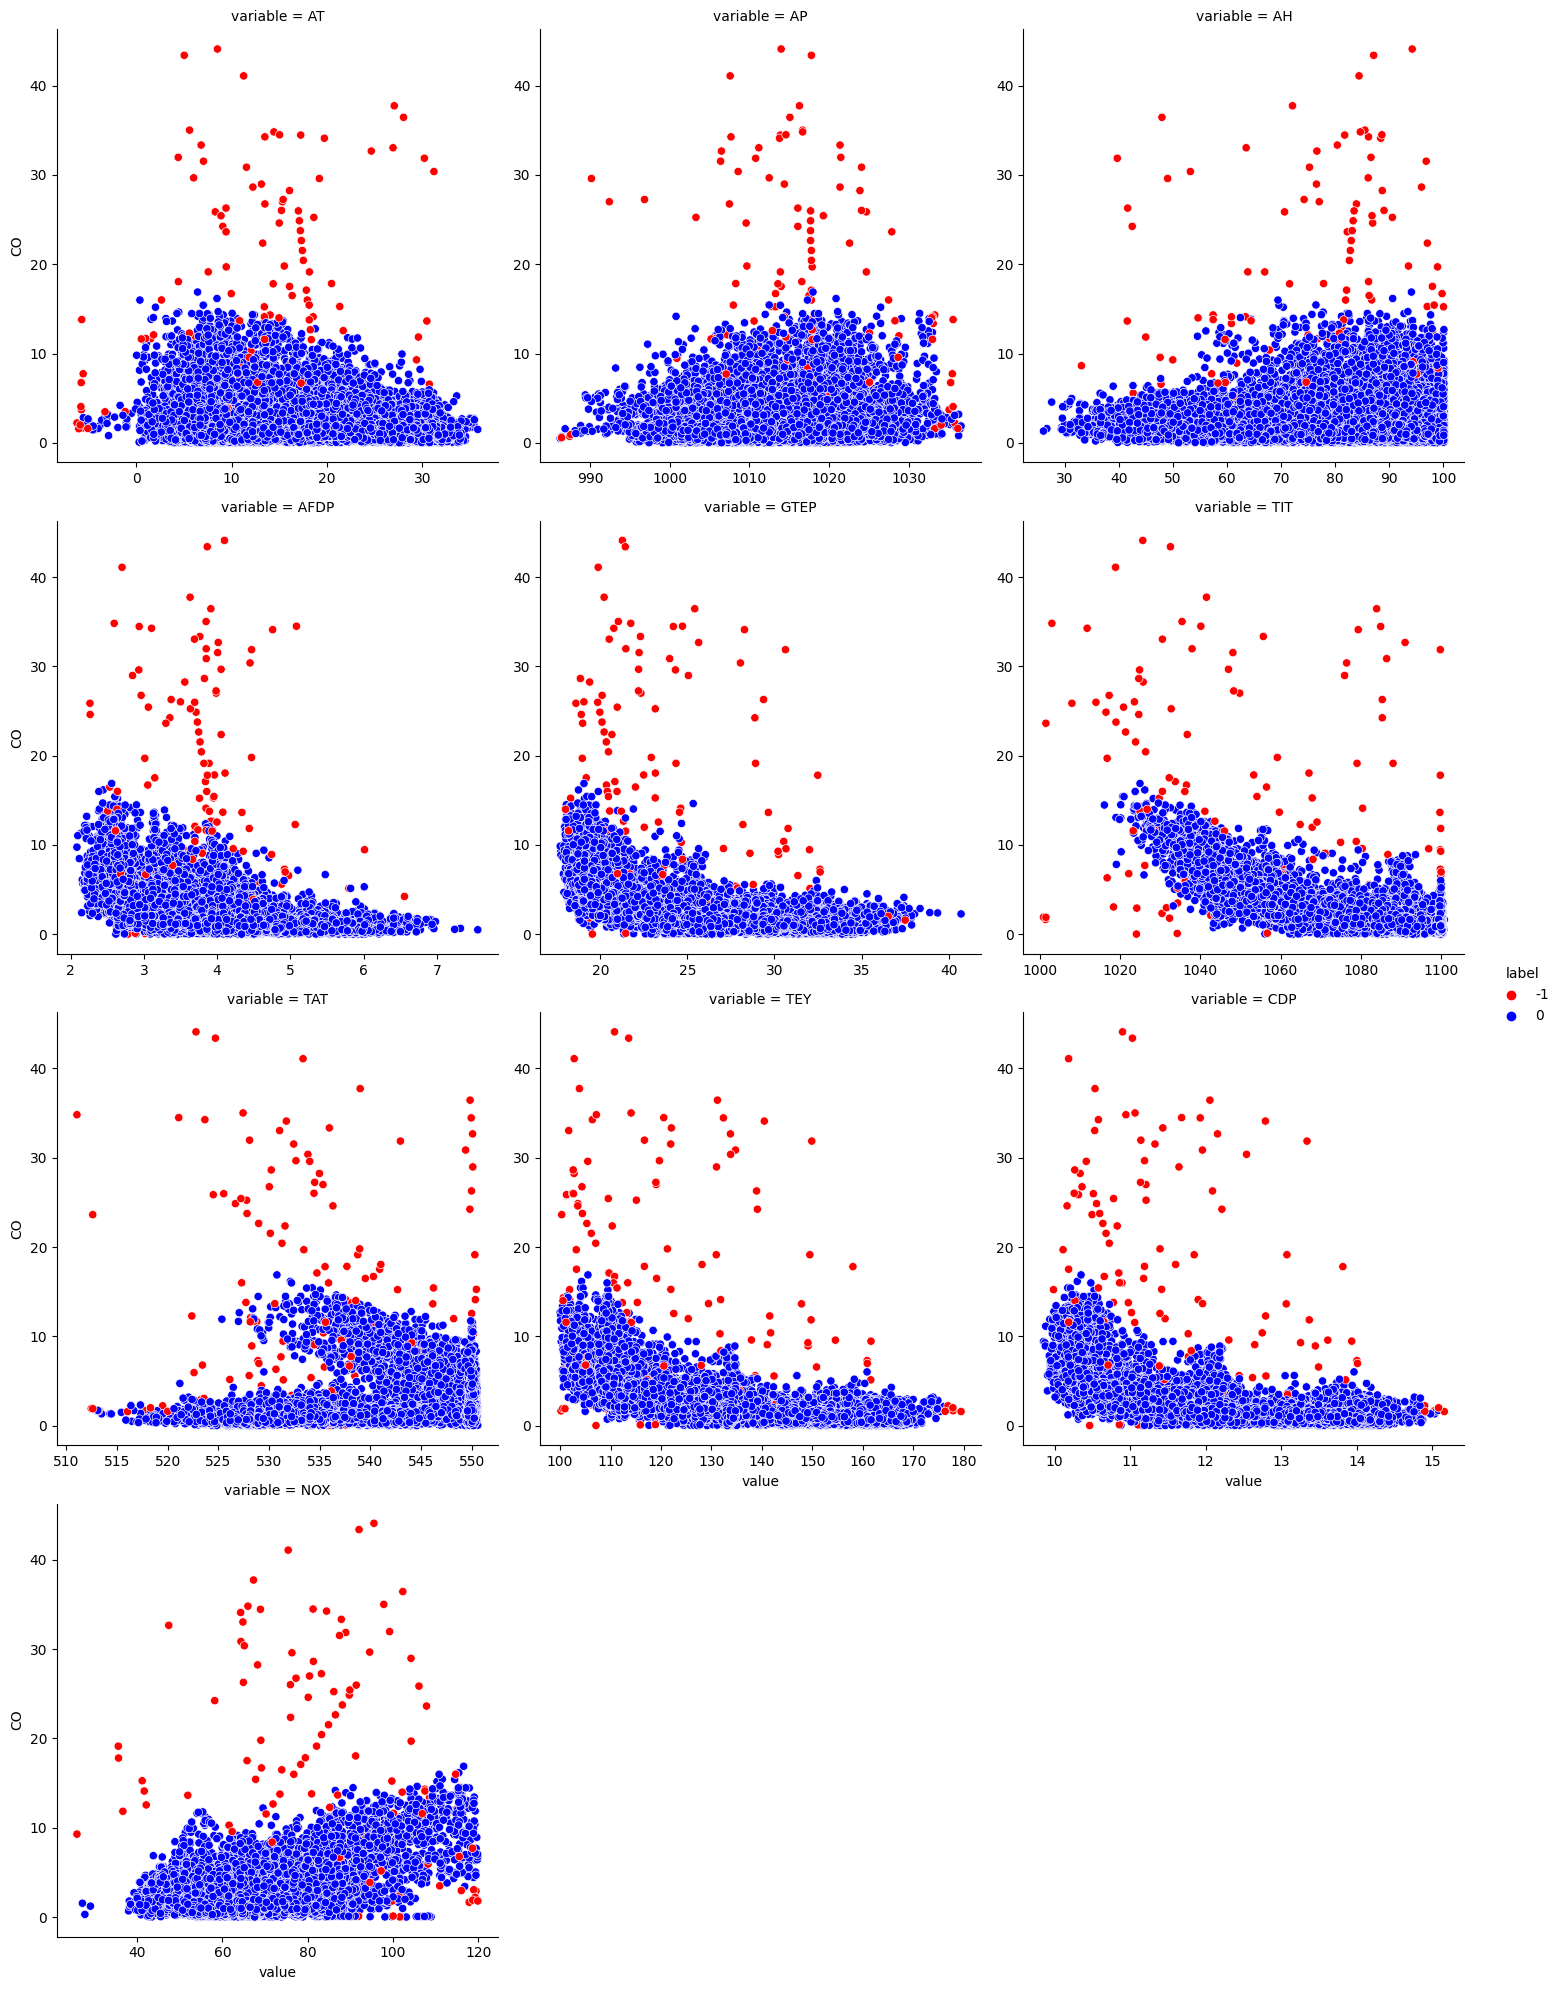

In [ ]:
# Create a copy of the dataset and a new attribute, in which we will save the received labels

df_db = df_train.copy()
df_db['label'] = db.labels_


# And once again look at the graphs of the target parameters. We denote emissions in red
ax = sns.relplot(
    x='value',
    y='CO',
    data=df_db.melt(id_vars=['CO', 'label'], value_vars=df_db),
    col='variable',
    col_wrap=3,
    hue='label',
    palette=['r', 'b'],
    facet_kws=dict(sharex=False, sharey=False)
)
ax.tight_layout();

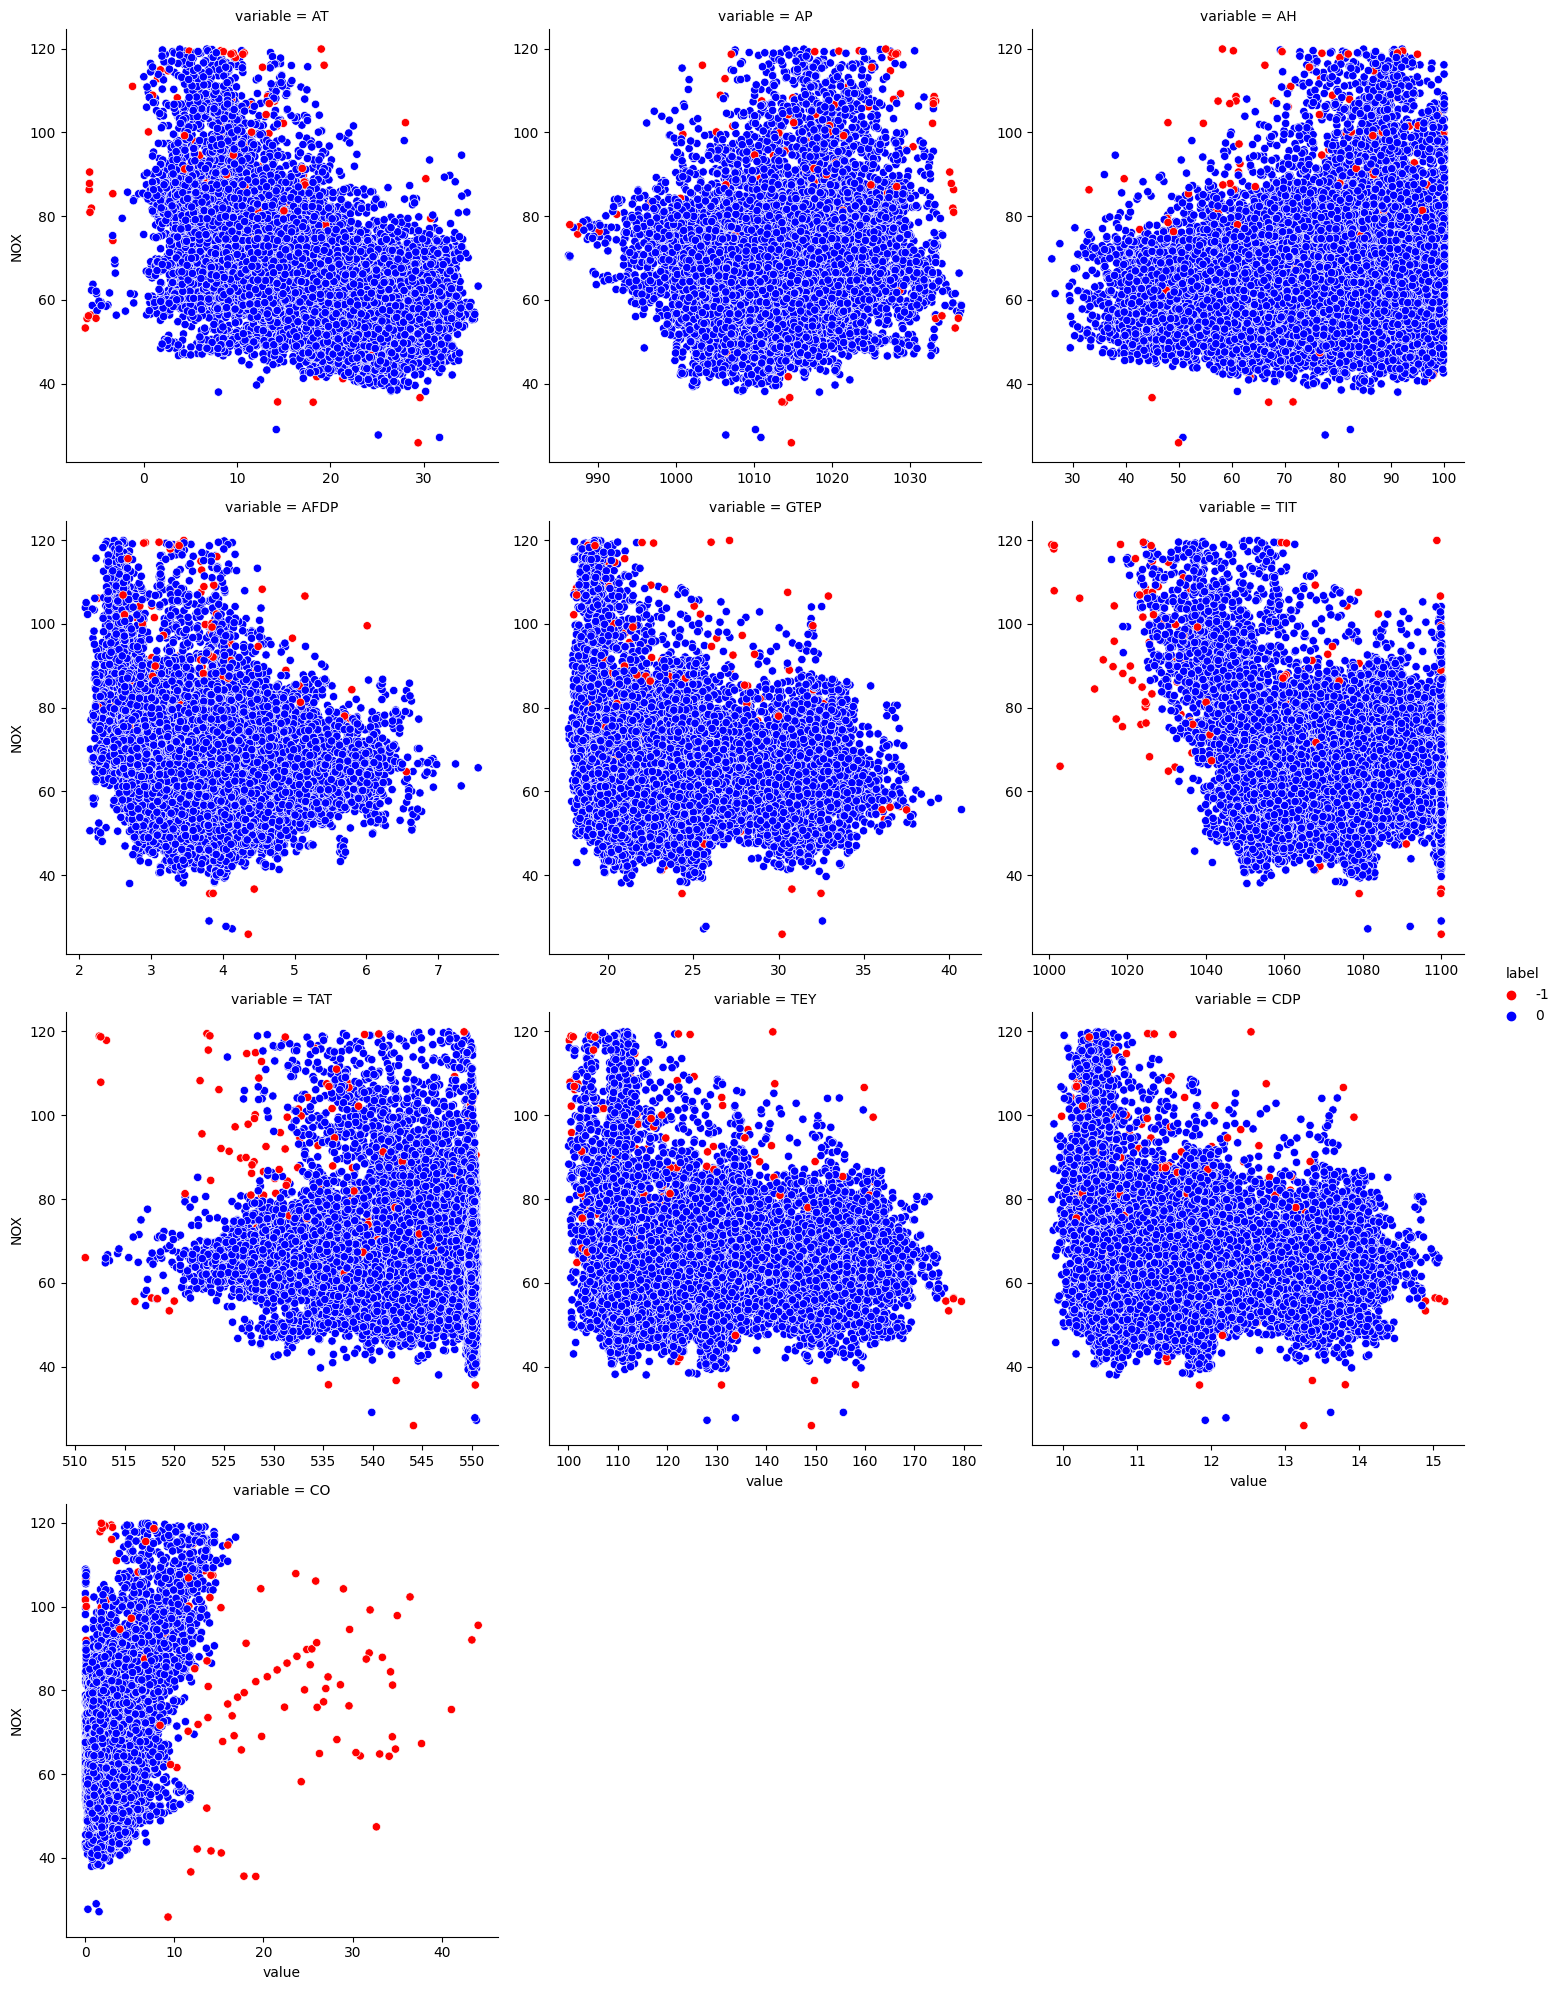

In [ ]:

# Let's build similar graphs for NOX

ax = sns.relplot(
    x='value',
    y='NOX',
    data=df_db.melt(id_vars=['NOX', 'label'], value_vars=df_db),
    col='variable',
    col_wrap=3,
    hue='label',
    palette=['r', 'b'],
    facet_kws=dict(sharex=False, sharey=False)
)
ax.tight_layout();


Overall, it turned out pretty well.

In [ ]:
# Now get the indices of the central samples

idx = db.core_sample_indices_

# Calculate the accuracy on the training set, taking into account the central samples

X_train = df_train.drop(['CO', 'NOX'], axis=1)
y_train = df_train[['CO', 'NOX']].copy()

X_test = df_test.drop(['CO', 'NOX'], axis=1)
y_test = df_test[['CO', 'NOX']].copy()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)


# Update metric values

metrics2 = defaultdict(dict)
scorers = ['neg_mean_squared_error', 'neg_mean_absolute_error']
features = ['CO', 'NOX']
for feature in features:
    for reg in (
        lin_reg,
        svc_reg,
        tre_reg,
        rnd_reg,
        xgb_reg,
        ):
        scores = cross_validate(reg, X_train_std[idx], y_train[feature].iloc[idx], scoring=scorers, n_jobs=-1)
        metrics2[reg.__class__.__name__] = {
            **metrics2[reg.__class__.__name__],
            **{
                f'{feature}_rmse': np.sqrt(-scores['test_neg_mean_squared_error']).mean(),
                f'{feature}_rmse_std': np.sqrt(-scores['test_neg_mean_squared_error']).std(),
                f'{feature}_mae': -scores['test_neg_mean_absolute_error'].mean(),
                f'{feature}_mae_std': scores['test_neg_mean_absolute_error'].std()
            }}

display_metrics(metrics2)

In [ ]:
# Compare the received values
diff_metrics(metrics2, metrics)


Excellent result! And again the best RandomForestRegressor

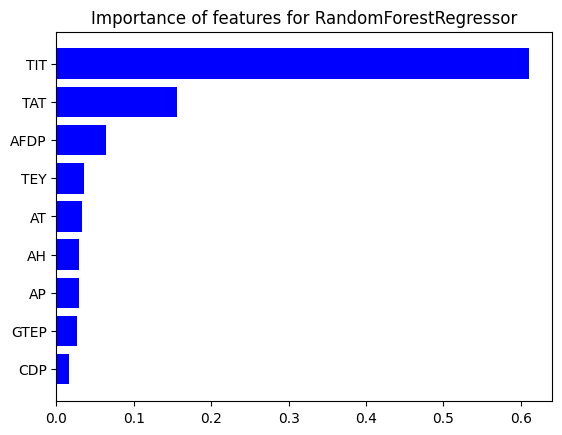

In [ ]:
# Derive the importance of features for CO

rnd_reg.fit(X_train_std[idx], y_train['CO'].iloc[idx])
plot_feature_importance(rnd_reg)

It can be seen that the importance of the TIT sign has increased

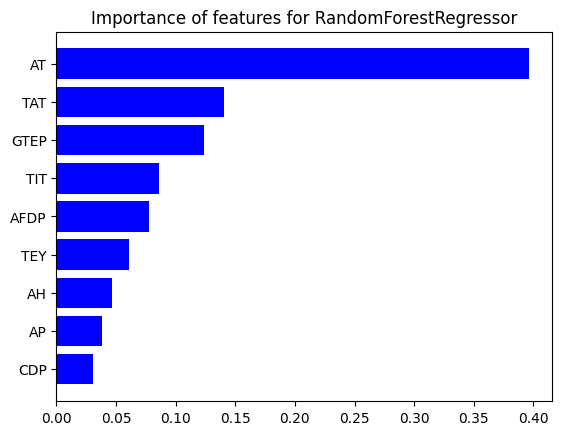

In [ ]:

# Derive feature importance for NOX

rnd_reg.fit(X_train_std[idx], y_train['NOX'].iloc[idx])
plot_feature_importance(rnd_reg)

Here, on the contrary, the importance of TIT has decreased

## Checking on a test set

Now let's prepare the test data. Let's train a classifier based on k-nearest neighbors, where we take values ​​from db.labels_ as labels.

In [ ]:

# 0 is an outlier, 1 is a normal value

labels = db.labels_ + 1

# Use the K nearest neighbors algorithm

knn = KNeighborsClassifier()

# Using the grid search, we select the optimal number of neighbors

param_grid = {'n_neighbors' : np.arange(2, 50)}
knn_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5)
knn_search.fit(X_train_std, labels)

# Let's look at the optimal value of the parameter

print(f'n_neighbors = {knn_search.best_params_["n_neighbors"]}')
print(f'best_score = {knn_search.best_score_:.3f}')


n_neighbors = 3
best_score = 0.997


In [ ]:
# Train a classifier with optimal parameters
knn = knn_search.best_estimator_
knn.fit(X_train_std, labels)


# Predict outliers among test data (including outliers among target parameters)
y_pred = knn.predict(X_test_std)

# Let's see how many outliers we got
unique, counts = np.unique(y_pred, return_counts=True)
np.c_[unique, counts]

array([[   0,   27],
       [   1, 7320]])

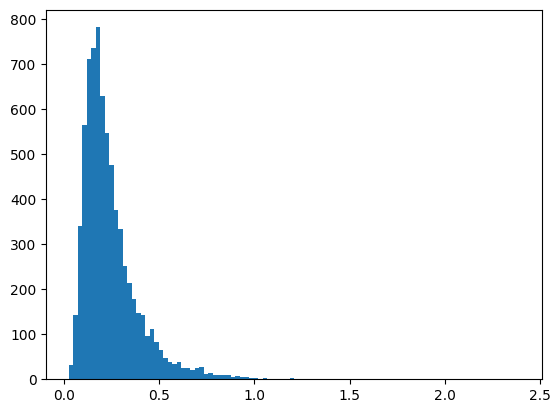

In [ ]:
# Let's try to raise the threshold using the kneighbors. Let's calculate the distances
y_dist, _  = knn.kneighbors(X_test_std, n_neighbors=1)
plt.hist(y_dist, bins=100);

Let's set the threshold at 0.9, that is, everything that is above will be considered an outlier

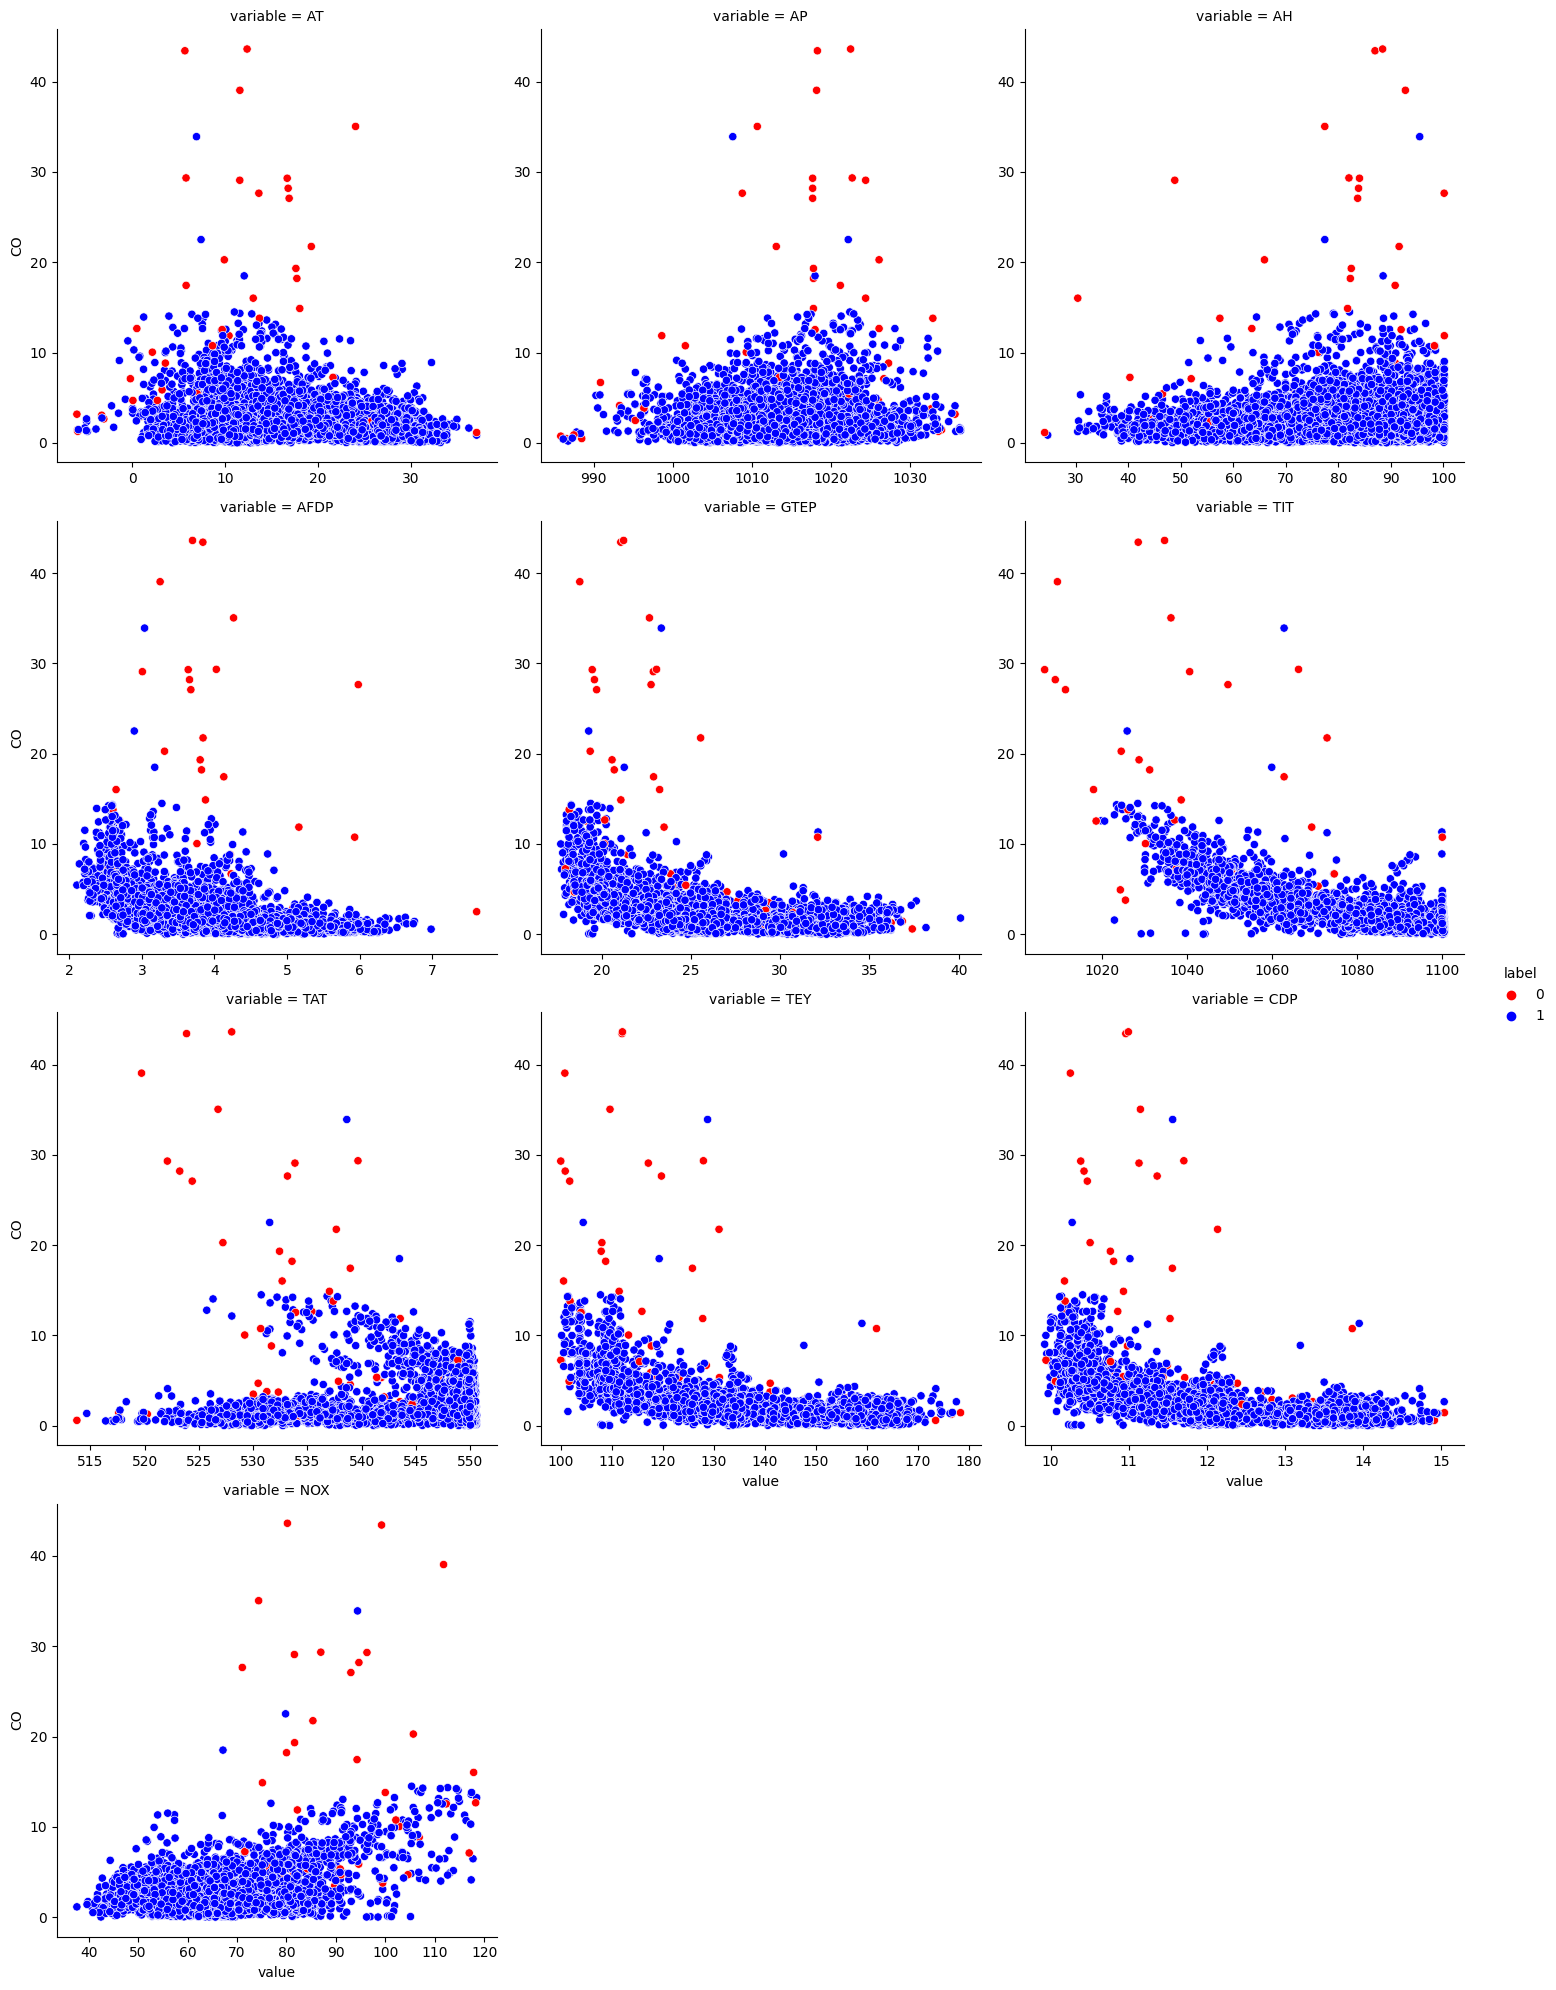

In [ ]:
# Set the threshold to 0.9, i.e. everything above will be considered an outlier

y_pred[y_dist.ravel()>0.9] = 0

df_db_test = df_test.copy()
df_db_test['label'] = y_pred

# Let's look at the graphs of the target parameters, on which we will separately highlight the outliers

ax = sns.relplot(
    x='value',
    y='CO',
    data=df_db_test.melt(id_vars=['CO', 'label'], value_vars=df_db_test),
    col='variable',
    col_wrap=3,
    hue='label',
    palette=['r', 'b'],
    facet_kws=dict(sharex=False, sharey=False)
)
ax.tight_layout();

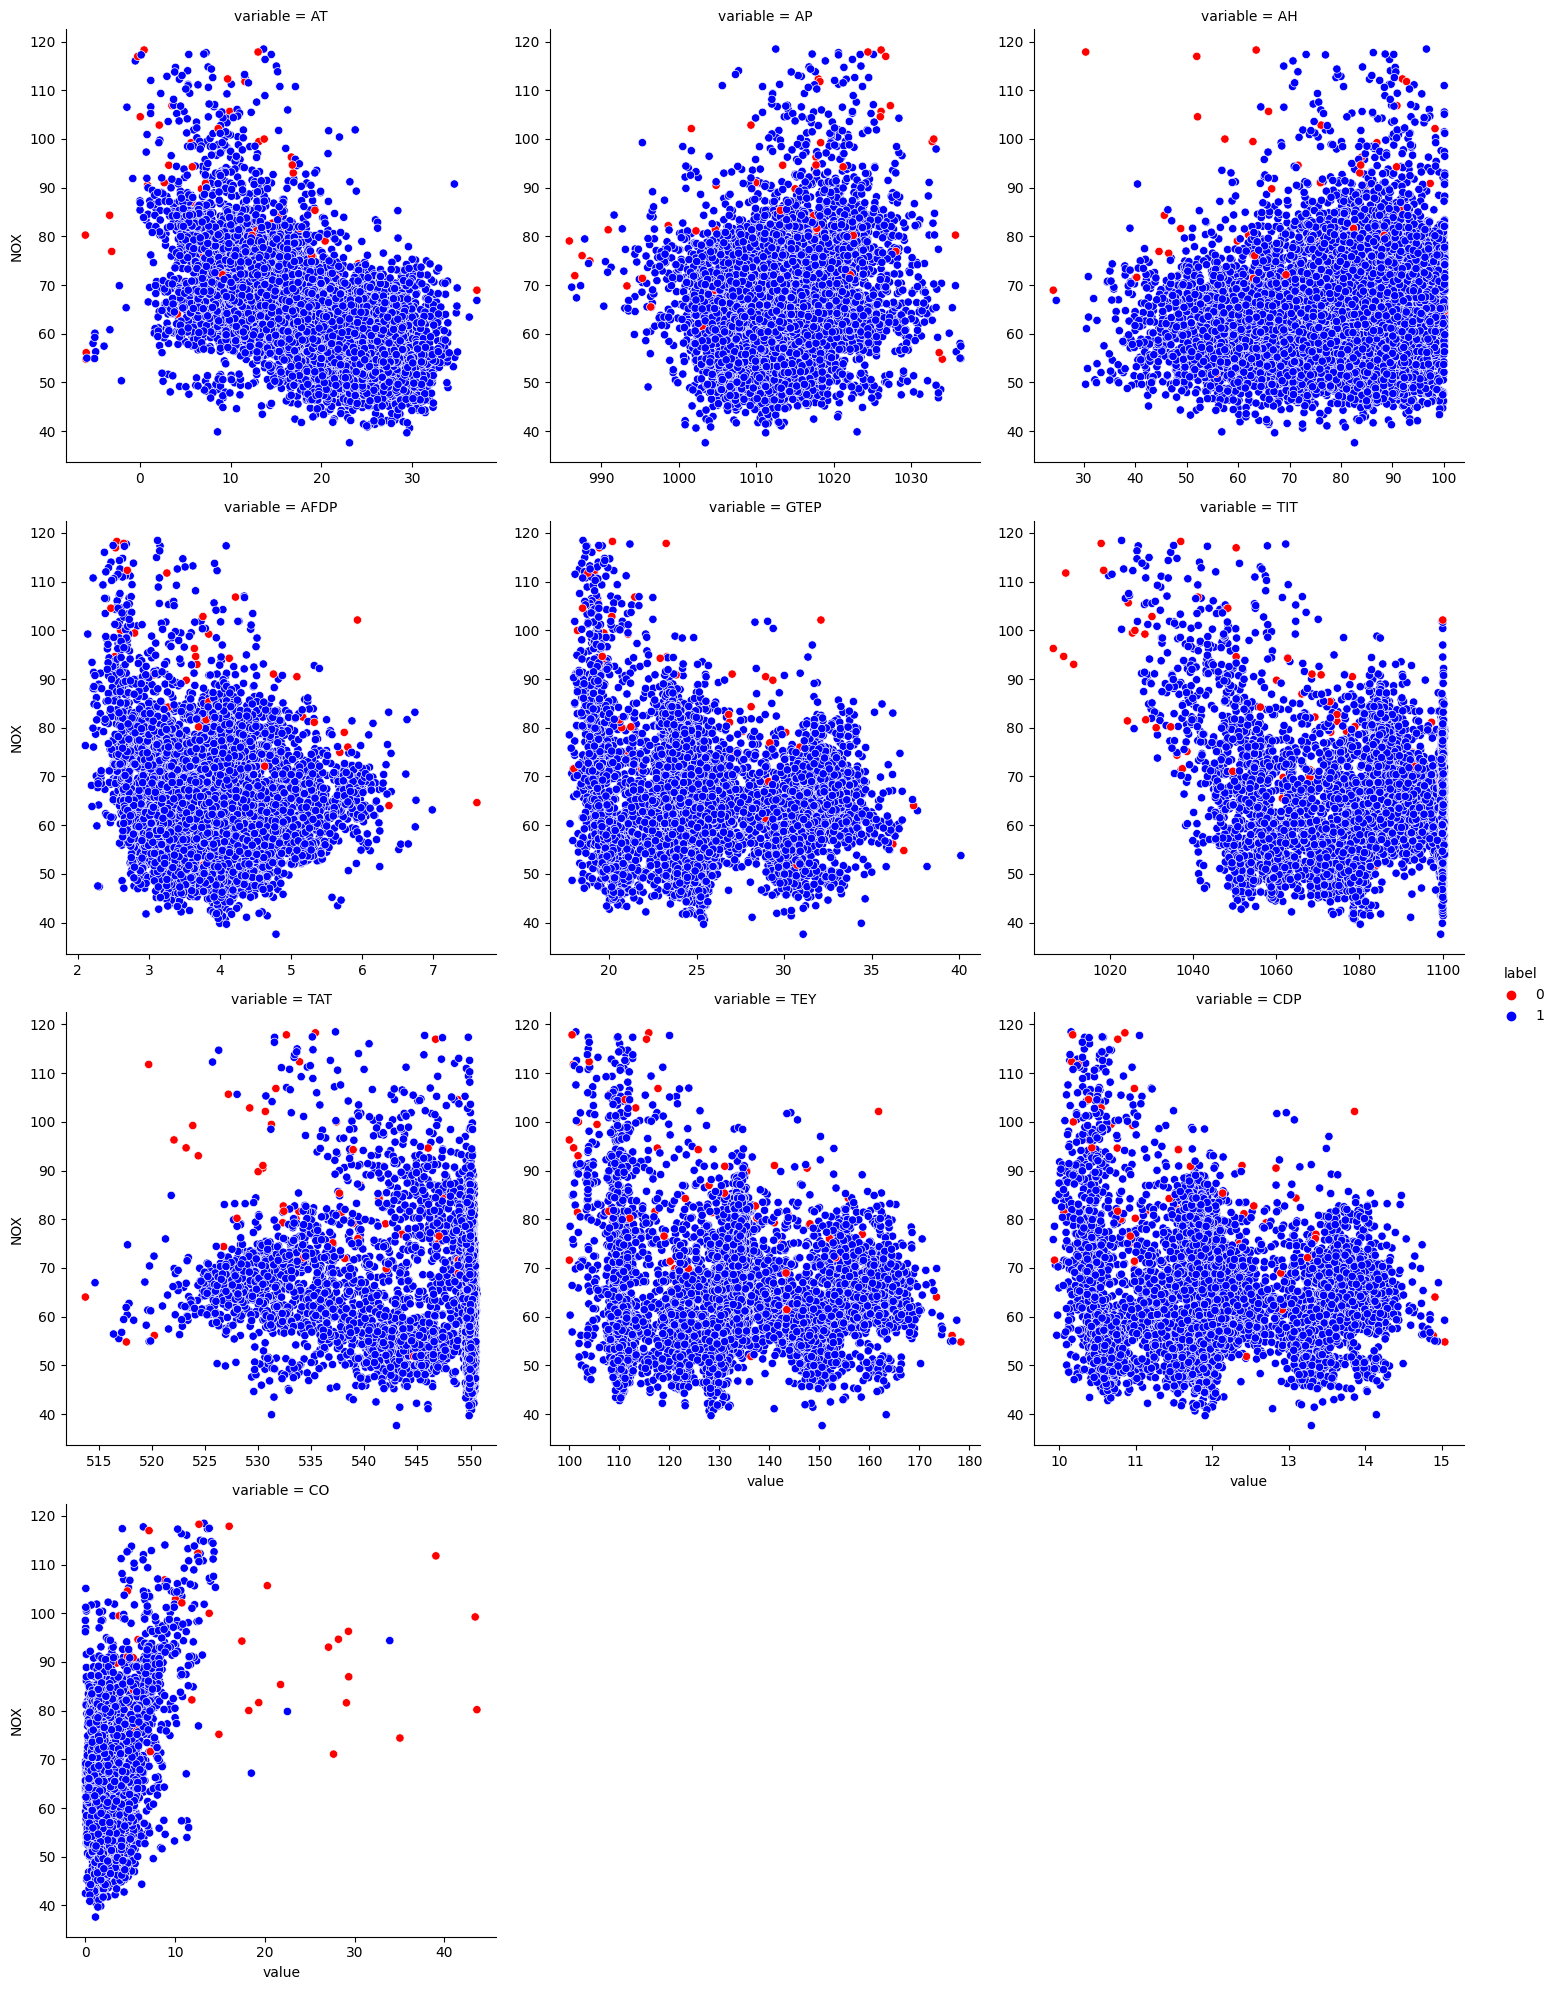

In [ ]:
# Let's build similar graphs for NOX

ax = sns.relplot(
    x='value',
    y='NOX',
    data=df_db_test.melt(id_vars=['NOX', 'label'], value_vars=df_db_test),
    col='variable',
    col_wrap=3,
    hue='label',
    palette=['r', 'b'],
    facet_kws=dict(sharex=False, sharey=False)
)
ax.tight_layout();

As you can see, we were pretty good at predicting outliers among the test data. In the prediction we will use only normal values

In [ ]:

# Store the indices of these values ​​in a separate variable

idxs = np.where(y_pred>0)[0]

# Update metric values

metrics3 = defaultdict(dict)
features = ['CO', 'NOX']
for feature in features:
    for reg in (
        lin_reg,
        svc_reg,
        tre_reg,
        rnd_reg,
        xgb_reg,
        ):
        reg.fit(X_train_std[idx], y_train[feature].iloc[idx])
        metrics3[reg.__class__.__name__] = {
            **metrics3[reg.__class__.__name__],
            **{
                f'{feature}_rmse': mean_squared_error(y_test[feature].iloc[idxs],
                                                       reg.predict(X_test_std[idxs]), squared=False),
                f'{feature}_mae': mean_absolute_error(y_test[feature].iloc[idxs],
                                                       reg.predict(X_test_std[idxs]))
            }}

display_metrics(metrics3)

# Conclusion

Random forest showed the best result. XGBRegressor showed itself a little worse. Perhaps if you search for optimal hyperparameters, then XGBRegressor will show the best accuracy. The values ​​of RMSE and MSE on the test set almost do not differ from the values ​​on the training set